# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Joshua Immanuel Fransisko Manurung
- Email: joshuamanurung2609@gmail.com
- Id Dicoding: josss26

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib

### Menyiapkan data yang akan digunakan

Melakukan load data menggunakan pandas

In [2]:
# melakukan read data menggunakan pandas
df = pd.read_csv('dataset/data.csv', delimiter=';')

# menampilkan beberapa 5 data teratas
df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

## Data Understanding

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2 (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

In [3]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# Mengecek data duplikat
df.duplicated().sum()

0

In [5]:
# mengecek missing value
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
# mengecek deskripsi statistik pada fitur data
df.describe(include='all')

Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  4424.000000             4424.000000   
unique                         NaN                     NaN   
top                            NaN                     NaN   
freq                           NaN                     NaN   
mean                      0.890823                4.577758   
std                       0.311897               10.216592   
min                       0.000000                1.000000   
25%                       1.000000                1.000000   
50%                       1.000000                1.000000   
75%                       1.000000                1.000000   
max                       1.000000               43.000000   

        Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                    4424.000000  4424.000000            4424.000000   
unique                           NaN          NaN                    NaN   
top                              NaN          NaN                    NaN   
freq                             NaN          NaN                    NaN   
mean                      132.613314     1.873192              19.561935   
std                        13.188332     6.914514              15.603186   
min                        95.000000     1.000000               1.000000   
25%                       125.000000     1.000000               2.000000   
50%                       133.100000     1.000000              19.000000   
75%                       140.000000     1.000000              37.000000   
max                       190.000000   109.000000              44.000000   

        Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
count             4424.000000  ...                        4424.000000   
unique                    NaN  ...                                NaN   
top                       NaN  ...                                NaN   
freq                      NaN  ...                                NaN   
mean                22.275316  ...                           0.541817   
std                 15.343108  ...                           1.918546   
min                  1.000000  ...                           0.000000   
25%                  3.000000  ...                           0.000000   
50%                 19.000000  ...                           0.000000   
75%                 37.000000  ...                           0.000000   
max                 44.000000  ...                          19.000000   

        Curricular_units_2nd_sem_enrolled  \
count                         4424.000000   
unique                                NaN   
top                                   NaN   
freq                                  NaN   
mean                             6.232143   
std                              2.195951   
min                              0.000000   
25%                              5.000000   
50%                              6.000000   
75%                              7.000000   
max                             23.000000   

        Curricular_

Berdasarkan cell tersebut total data yang ada adalah 4424 data dengan 37 kolom. Dan juga dataset yang digunakan tidak memiliki missing value serta tidak adanya data yang duplikat. 

berdasarkan fungsi `df.describe` tidak terdapat adanya anomali terhadap data, serta semua kolom memiliki tipe data yang sesuai. dan juga tipe data kategorikal pada dataset telah diubah ke dalam bentuk numerikal.

In [7]:
# mengecek unique value pada fitur target
df.Status.nunique()

3

In [8]:
# Menampilkan statistik persebaran data fitur Status
target_feature = df['Status'].value_counts()
target_feature

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Berdasarkan fungsi `df.info()` dapat dilihat yang menjadi fitur target dari dataset tersebut adalah fitur **Status**, memiliki 3 value yaitu Graduate, Dropout, dan Enrolled dengan total data masing-masing adalah 2209, 1421, 794

### Exploratory Data Analysis

Untuk melakukan analisis lebih lanjut akan dilakukan label decoding terhadap beberapa fitur yang sebenarnya adalah fitur kategorikal yang di representasikan dalam bentuk data numerik.

Membuat variabel untuk menampung value dari fitur yang ingin di mapping.

In [9]:
# Membuat variabel untuk menyimpan mapping fitur kategori ke value sebenarnya
marital_status_map = {
1: 'single',
2: 'married',
3: 'widower',
4: 'divorced',
5: 'facto union',
6: 'legally separated'
}

application_mode_map = {
1: '1st phase - general contingent',
2: 'Ordinance No. 612/93',
5: '1st phase - special contingent (Azores Island)',
7: 'Holders of other higher courses',
10: 'Ordinance No. 854-B/99',
15: 'International student (bachelor)',
16: '1st phase - special contingent (Madeira Island)',
17: '2nd phase - general contingent',
18: '3rd phase - general contingent',
26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
39: 'Over 23 years old',
42: 'Transfer',
43: 'Change of course',
44: 'Technological specialization diploma holders',
51: 'Change of institution/course',
53: 'Short cycle diploma holders',
57: 'Change of institution/course (International)'
}

course_map = {
33: 'Biofuel Production Technologies',
171: 'Animation and Multimedia Design',
8014: 'Social Service (evening attendance)',
9003: 'Agronomy',
9070: 'Communication Design',
9085: 'Veterinary Nursing',
9119: 'Informatics Engineering',
9130: 'Equinculture',
9147: 'Management',
9238: 'Social Service',
9254: 'Tourism',
9500: 'Nursing',
9556: 'Oral Hygiene',
9670: 'Advertising and Marketing Management',
9773: 'Journalism and Communication',
9853: 'Basic Education',
9991: 'Management (evening attendance)'
}

attendance_map = {
1: 'daytime',
0: 'evening'
}

prev_qualification_map = {
1: 'Secondary education',
2: "Higher education - bachelor's degree",
3: 'Higher education - degree',
4: "Higher education - master's",
5: 'Higher education - doctorate',
6: 'Frequency of higher education',
9: '12th year of schooling - not completed',
10: '11th year of schooling - not completed',
12: 'Other - 11th year of schooling',
14: '10th year of schooling',
15: '10th year of schooling - not completed',
19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
39: 'Technological specialization course',
40: 'Higher education - degree (1st cycle)',
42: 'Professional higher technical course',
43: 'Higher education - master (2nd cycle)'
}

nationality_map = {
1: 'Portuguese',
2: 'German',
6: 'Spanish',
11: 'Italian',
13: 'Dutch',
14: 'English',
17: 'Lithuanian',
21: 'Angolan',
22: 'Cape Verdean',
24: 'Guinean',
25: 'Mozambican',
26: 'Santomean',
32: 'Turkish',
41: 'Brazilian',
62: 'Romanian',
100: 'Moldova (Republic of)',
101: 'Mexican',
103: 'Ukrainian',
105: 'Russian',
108: 'Cuban',
109: 'Colombian'
}

# value untuk fitur father and mother qualification digabungkan
parent_qualification_map = {
1: "Secondary Education - 12th Year of Schooling or Eq.",
2: "Higher Education - Bachelor's Degree",
3: "Higher Education - Degree",
4: "Higher Education - Master's",
5: "Higher Education - Doctorate",
6: "Frequency of Higher Education",
9: "12th Year of Schooling - Not Completed",
10: "11th Year of Schooling - Not Completed",
11: "7th Year (Old)",
12: "Other - 11th Year of Schooling",
13: "2nd year complementary high school course",
14: "10th Year of Schooling",
18: "General commerce course",
19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
20: "Complementary High School Course",
22: "Technical-professional course",
25: "Complementary High School Course - not concluded",
26: "7th year of schooling",
27: "2nd cycle of the general high school course",
29: "9th Year of Schooling - Not Completed",
30: "8th year of schooling",
31: "General Course of Administration and Commerce",
33: "Supplementary Accounting and Administration",
34: "Unknown",
35: "Can't read or write",
36: "Can read without having a 4th year of schooling",
37: "Basic education 1st cycle (4th/5th year) or equiv.",
38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
39: "Technological specialization course",
40: "Higher education - degree (1st cycle)",
41: "Specialized higher studies course",
42: "Professional higher technical course",
43: "Higher Education - Master (2nd cycle)",
44: "Higher Education - Doctorate (3rd cycle)"
}

# value untuk fitur father and mom occupation di gabungkan
parent_occupation_map = {
0: "Student",
1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
2: "Specialists in Intellectual and Scientific Activities",
3: "Intermediate Level Technicians and Professions",
4: "Administrative staff",
5: "Personal Services, Security and Safety Workers and Sellers",
6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
7: "Skilled Workers in Industry, Construction and Craftsmen",
8: "Installation and Machine Operators and Assembly Workers",
9: "Unskilled Workers",
10: "Armed Forces Professions",
90: "Other Situation",
99: "(blank)",
101: "Armed Forces Officers",
102: "Armed Forces Sergeants",
103: "Other Armed Forces personnel",
112: "Directors of administrative and commercial services",
114: "Hotel, catering, trade and other services directors",
121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
122: "Health professionals",
123: "Teachers",
124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
125: "Specialists in information and communication technologies (ICT)",
131: "Intermediate level science and engineering technicians and professions",
132: "Technicians and professionals, of intermediate level of health",
134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
135: "Information and communication technology technicians",
141: "Office workers, secretaries in general and data processing operators",
143: "Data, accounting, statistical, financial services and registry-related operators",
144: "Other administrative support staff",
151: "Personal service workers",
152: "Sellers",
153: "Personal care workers and the like",
154: "Protection and security services personnel",
161: "Market-oriented farmers and skilled agricultural and animal production workers",
163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
171: "Skilled construction workers and the like, except electricians",
172: "Skilled workers in metallurgy, metalworking and similar",
174: "Skilled workers in electricity and electronics",
175: "Workers in food processing, woodworking, clothing and other industries and crafts",
181: "Fixed plant and machine operators",
182: "Assembly workers",
183: "Vehicle drivers and mobile equipment operators",
191: "Cleaning workers",
192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
194: "Meal preparation assistants",
195: "Street vendors (except food) and street service providers"
}

# untuk fitur biner
binary_yes_no_map = {1: 'yes', 0: 'no'}
gender_map = {1: 'male', 0: 'female'}

In [10]:
# fungsi untuk melakukan Decoding terhadap fitur kategori
def decode_df(df):
    mappings = {
        'Marital_status': marital_status_map,
        'Application_mode': application_mode_map,
        'Course': course_map,
        'Daytime_evening_attendance': attendance_map,
        'Previous_qualification': prev_qualification_map,
        'Nacionality': nationality_map,
        "Mothers_qualification": parent_qualification_map,
        "Fathers_qualification": parent_qualification_map,
        "Mothers_occupation": parent_occupation_map,
        "Fathers_occupation": parent_occupation_map,
        'Displaced': binary_yes_no_map,
        'Educational_special_needs': binary_yes_no_map,
        'Debtor': binary_yes_no_map,
        'Tuition_fees_up_to_date': binary_yes_no_map,
        'Gender': gender_map,
        'Scholarship_holder': binary_yes_no_map,
        'International': binary_yes_no_map
    }

    # menggunakan iterasi untuk melakukan mapping pada setiap kolom yang diganti
    for column, mapping in mappings.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)

    return df

Mengkopi data asli, untuk melakukan label decoding ke data frame baru

In [11]:
decoded_df = decode_df(df.copy())

In [12]:
decoded_df

Marital_status                  Application_mode  Application_order  \
0            single    2nd phase - general contingent                  5   
1            single  International student (bachelor)                  1   
2            single    1st phase - general contingent                  5   
3            single    2nd phase - general contingent                  2   
4           married                 Over 23 years old                  1   
...             ...                               ...                ...   
4419         single    1st phase - general contingent                  6   
4420         single    1st phase - general contingent                  2   
4421         single    1st phase - general contingent                  1   
4422         single    1st phase - general contingent                  1   
4423         single            Ordinance No. 854-B/99                  1   

                                   Course Daytime_evening_attendance  \
0         Animation and Multimedia Design                    daytime   
1                                 Tourism                    daytime   
2                    Communication Design                    daytime   
3            Journalism and Communication                    daytime   
4     Social Service (evening attendance)                    evening   
...                                   ...                        ...   
4419         Journalism and Communication                    daytime   
4420         Journalism and Communication                    daytime   
4421                              Nursing                    daytime   
4422                           Management                    daytime   
4423         Journalism and Communication                    daytime   

     Previous_qualification  Previous_qualification_grade   Nacionality  \
0       Secondary education                         122.0    Portuguese   
1       Secondary education                         160.0    Portuguese   
2       Secondary education                         122.0    Portuguese   
3       Secondary education                         122.0    Portuguese   
4       Secondary education                         100.0    Portuguese   
...                     ...                           ...           ...   
4419    Secondary education                         125.0    Portuguese   
4420    Secondary education                         120.0       Russian   
4421    Secondary education                         154.0    Portuguese   
4422    Secondary education                         180.0    Portuguese   
4423    Secondary education                         152.0  Cape Verdean   

                                  Mothers_qualification  \
0     Basic Education 3rd Cycle (9th/10th/11th Year)...   
1     Secondary Education - 12th Year of Schooling o...   
2     Basic education 1st cycle (4th/5th year) or eq...   
3     Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4     Basic education 1st cycle (4th/5th year) or eq...   
...                                                 ...   
4419  Secondary Education - 12th Year of Schooling o...   
4420  Secondary Education - 12th Year of Schooling o...   
4421  Basic education 1st cycle (4th/5th year) or eq...   
4422  Basic education 1st cycle (4th/5th year) or eq...   
4423  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                  Fathers_qualification  ...  \
0                        Other - 11th Year of Schooling  ...   
1                             Higher Education - Degree  ...   
2     Basic education 1st cycle (4th/5th year) or eq...  ...   
3     Basic education 1st cycle (4th/5th year) or eq...  ...   
4     Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   
...                                                 ...  ...   
4419  Secondary Education - 12th Year of Schooling o...  ...   
4420  Secondary Education - 12th Year of Schooling o...  ...   
4421  Basic education 1st cycle (4th/5th 

In [13]:
# mengecek tipe data fitur kategori telah sesuai
decoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

#### Univariate Analysis

Melakukan Univariate Analysis untuk melihat persebaran data pada masing-masing fitur.

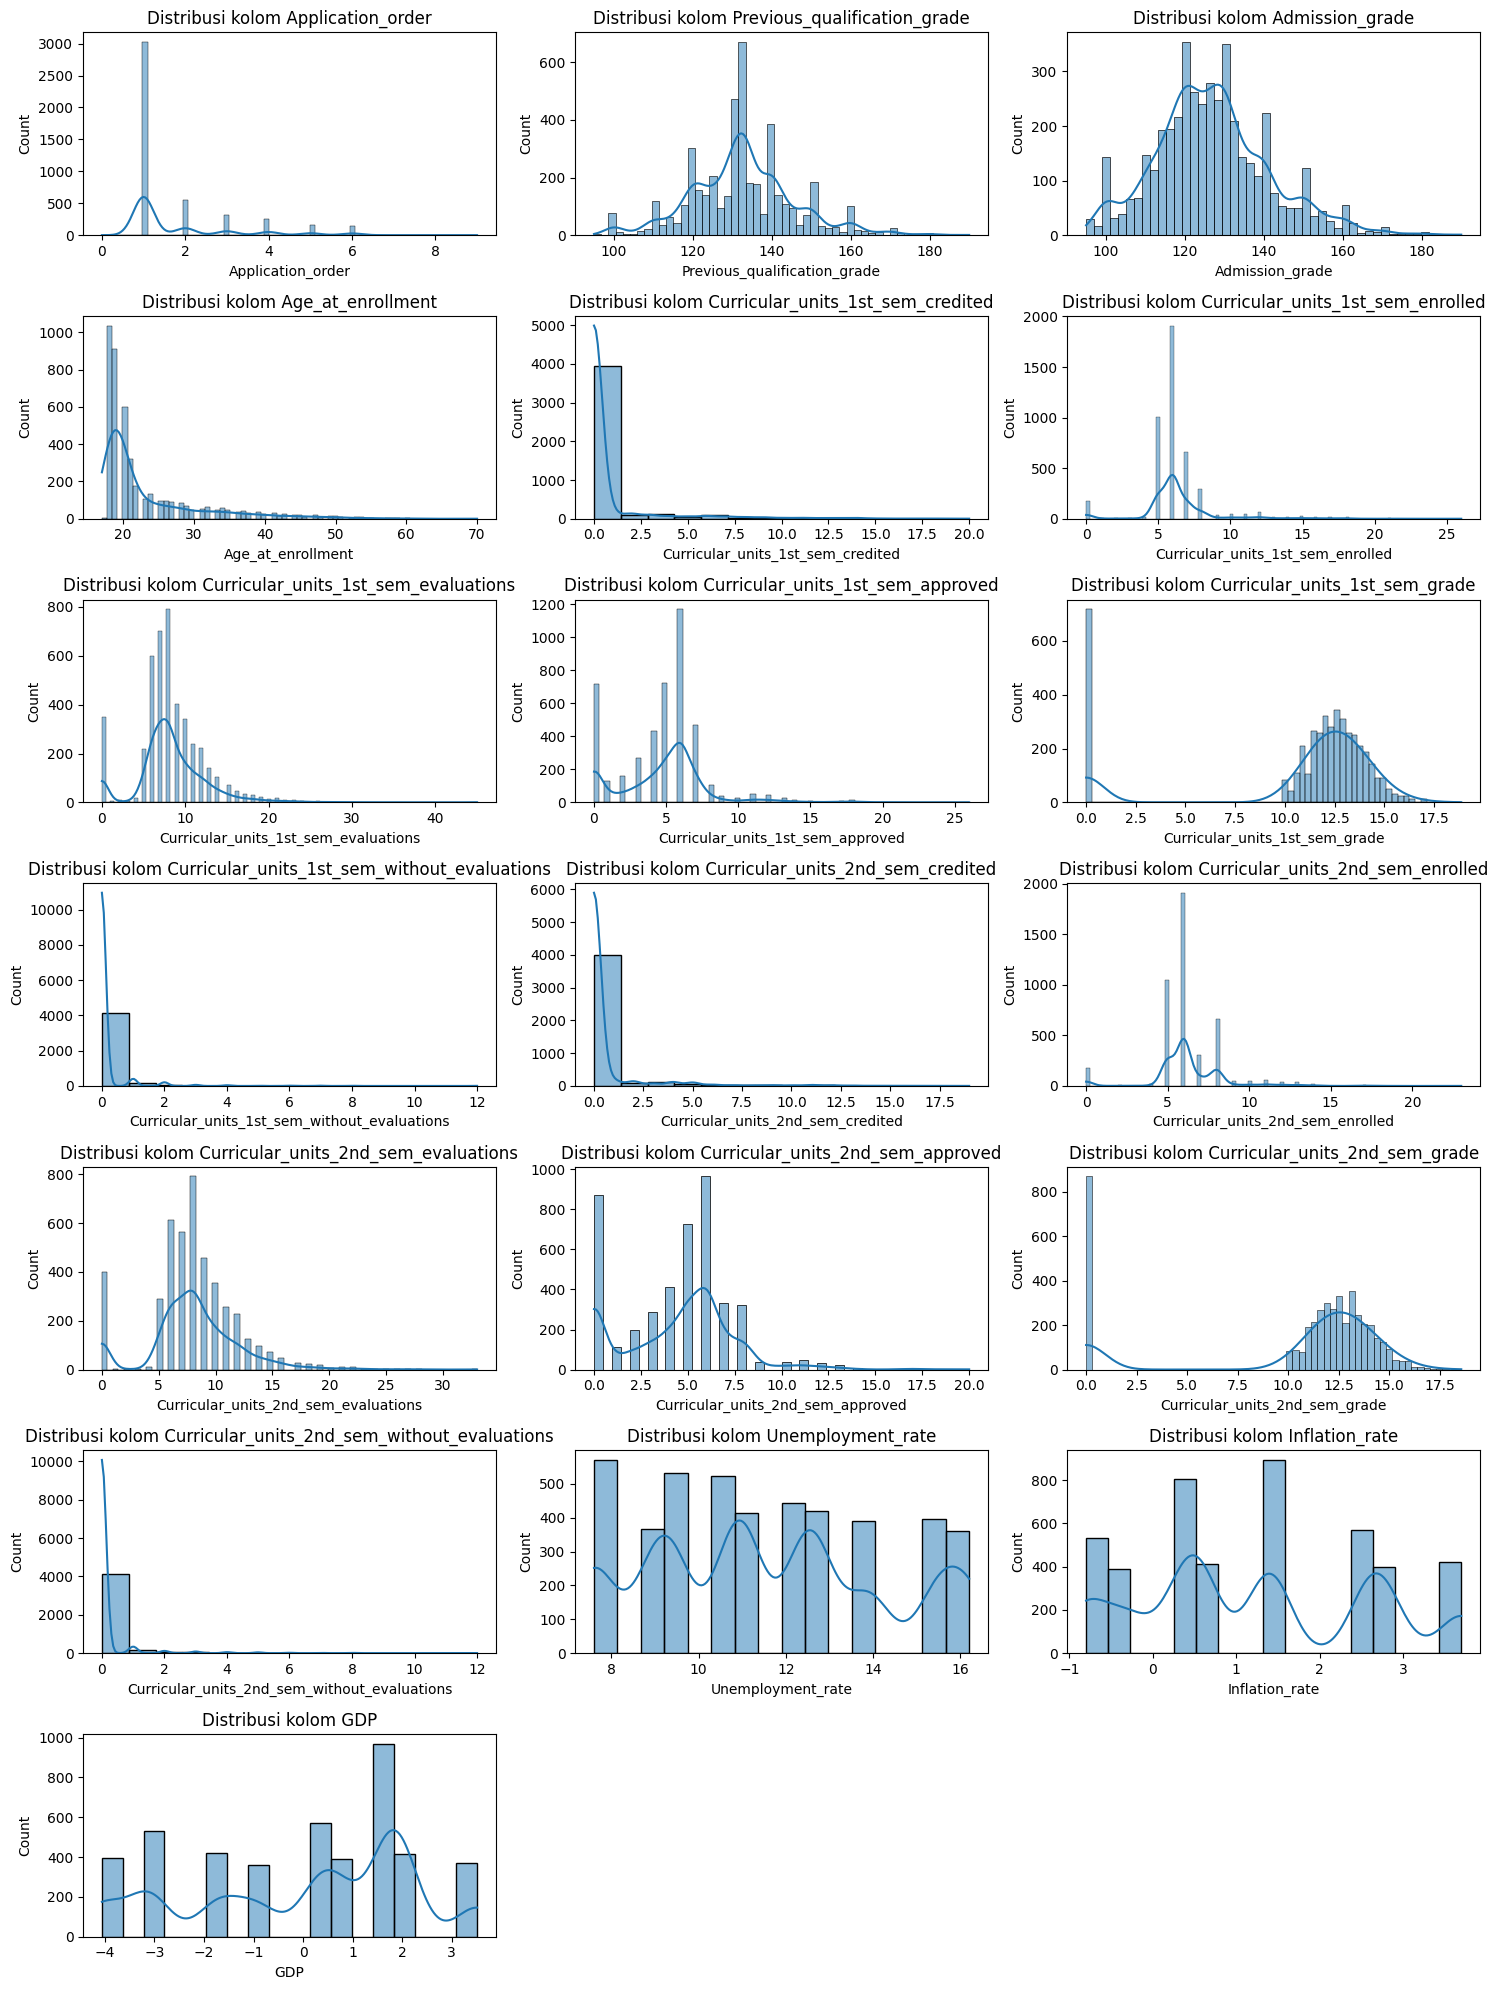

In [14]:
# variabel list kolom numerik
numerical_cols = decoded_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# membuat plot histogram univariate untuk kolom numerik
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(decoded_df[col], kde=True)
    plt.title(f'Distribusi kolom {col}')
plt.tight_layout()
plt.show()

berdasarkan hasil plot tersebut dapat dilihat bahwa:
- **Application_order** serta **Age_at_enrollment** memiliki distribusi right-skewed. pada apllication order menunjukkan mayoritas mahasiswa diterima mendaftar pada pilihan pertama mereka. dan usia mereka saat mendaftar berada dikisaran 18-20 tahun.
- semester 1 & 2 fitur **Circular units** baik credited, enrolled, evaluations, approved dan grade memiliki distribusi yang mirip pada semester 1 dan 2 nya.
- fitur **previous_qualification_grade** dan **Admission_grade** memiliki distribusi yang tergolong normal dengan puncak berada disekitar 120-150.
- fitur lainnya memiliki ditribusi banyak puncak.

untuk mempermudah visualisasi univariate analisis dari kolom kategori, maka akan digunakan dataframe yang sebelum di decoding.

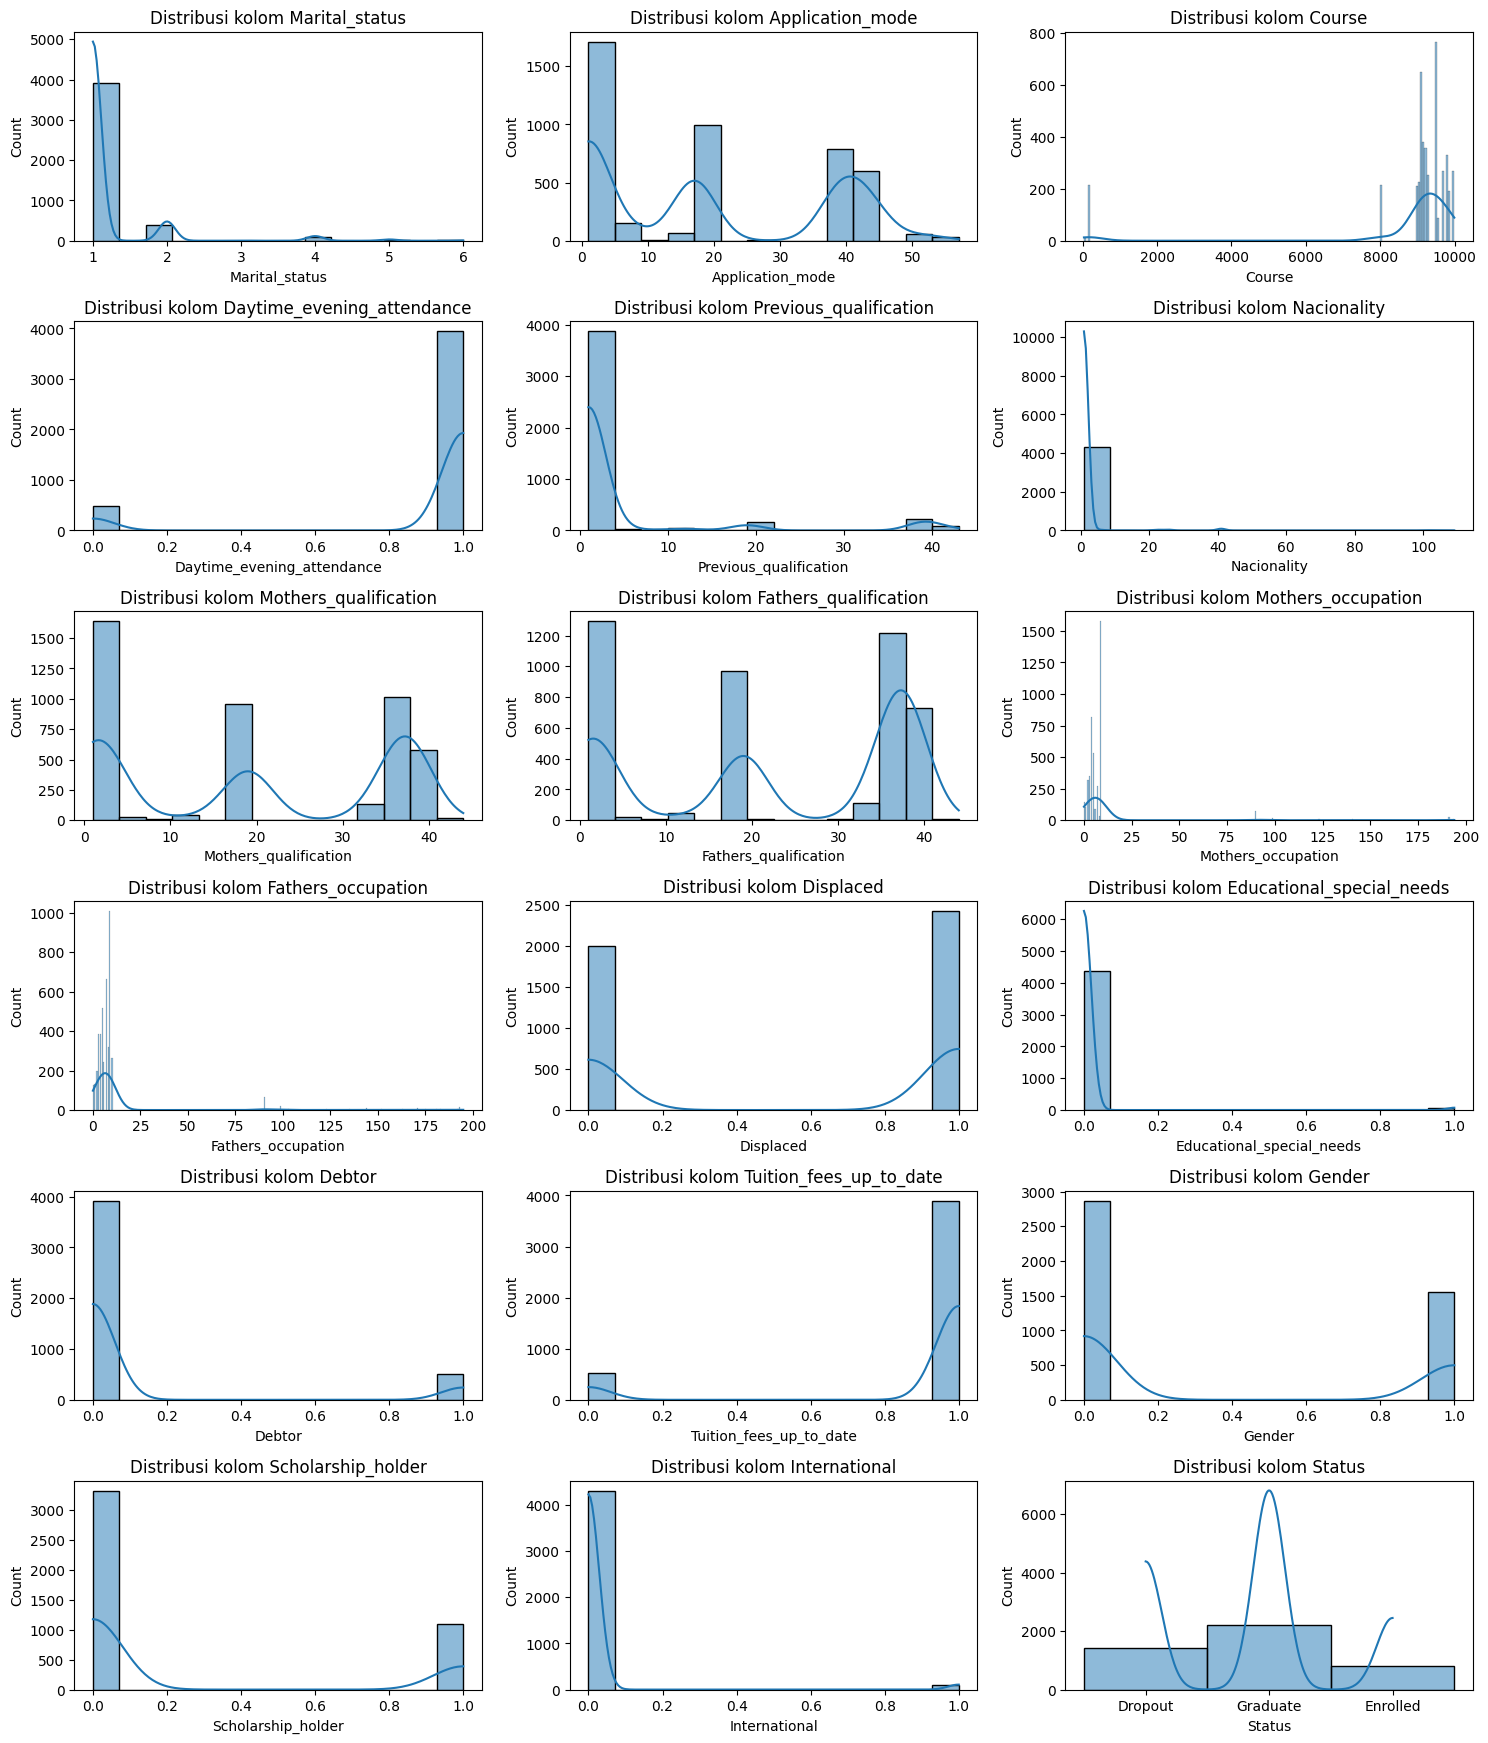

In [15]:
# variabel list kolom kategori
categorical_cols = decoded_df.select_dtypes(include=['object']).columns.tolist()

# membuat plot histogram univariate untuk kolom kategori
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi kolom {col}')
plt.tight_layout()
plt.show()

berdasarkan plot diatas dapat diambil kesimpulan:
- kebanyakan mayoritas mahasiswa lajang, berjenis kelamin perempuan, berasal dari negara portugal, serta memiliki latar belakang sosial ekonomi yang beragam.
- mayoritas mahasiswa mengikuti kelas siang hari, serta berasal dari pendidikan SMA.
- mayoritas mahasiswa tidak penerima beasiswa, serta mayoritas mahasiswa membayar uang kuliah tepat waktu.
- mayoritas menjawab **Tidak (NO)** pada fitur seperti **Displaced**, **Debtor**, dan **Educational_special_needs**.

#### Multivariate Analysis

Melakukan Multivariate Analysis, dengan melihat distribusi fitur target terhadap fitur lain seperti numerik dan kategori

##### Status vs Numeric Features

In [16]:
# Helper Function untuk membuat plot histogram Status VS Fitur Numerik
def numerical_plot(feature, df, feature_target):
    for col in feature:
        sns.histplot(data=df, x=col, hue=feature_target, kde=True, multiple='layer')
        plt.title(f'Distribusi Status VS {col}')
        plt.show()

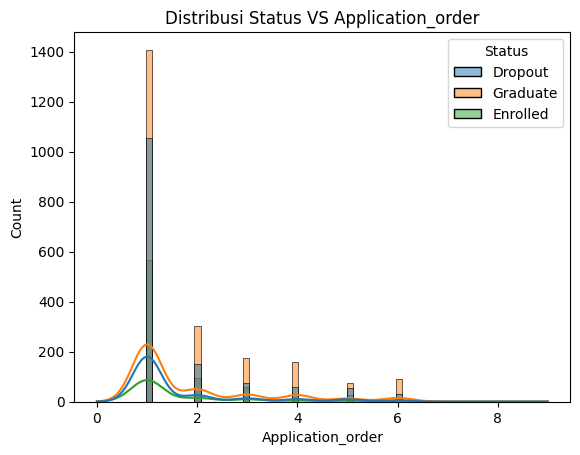

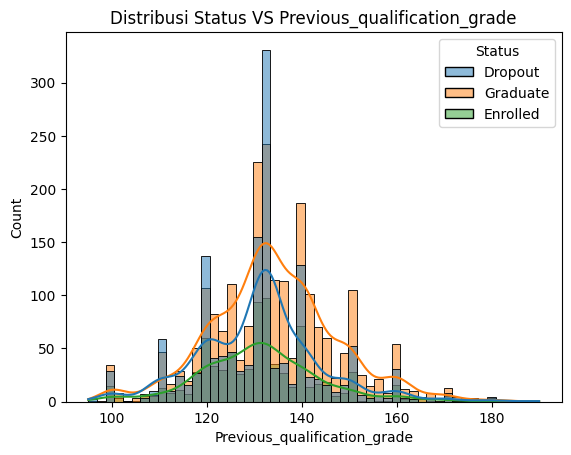

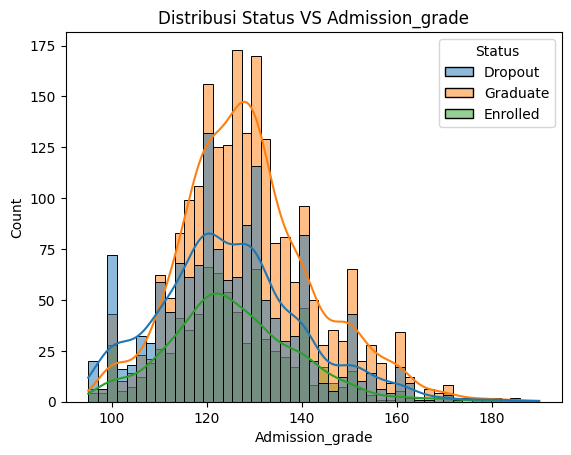

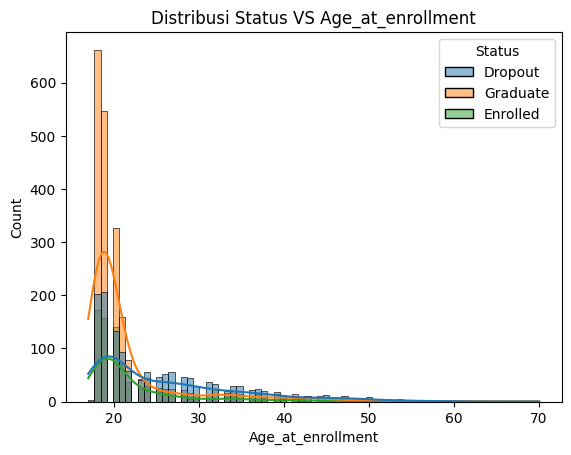

In [17]:
numerical_plot(
    feature=numerical_cols[:4],
    df=decoded_df,
    feature_target='Status'
)

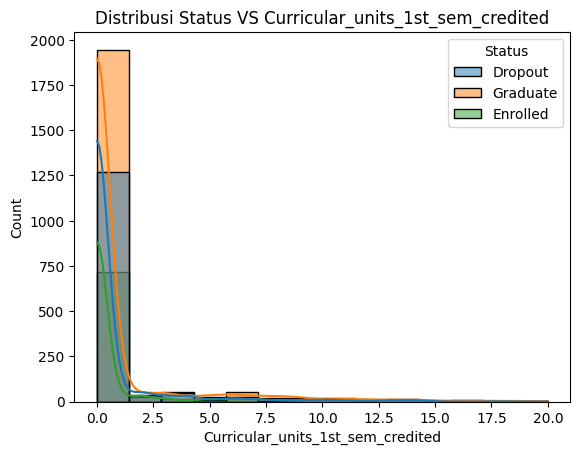

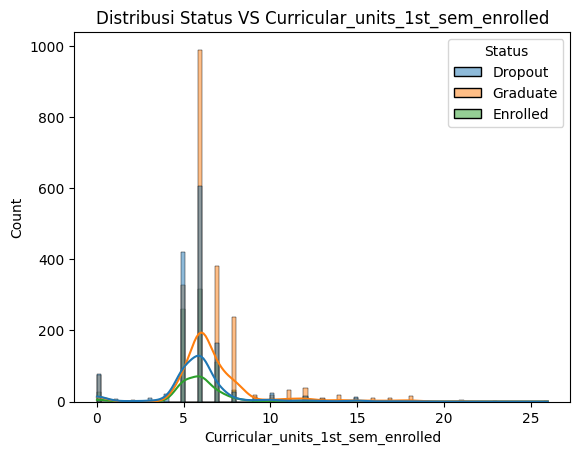

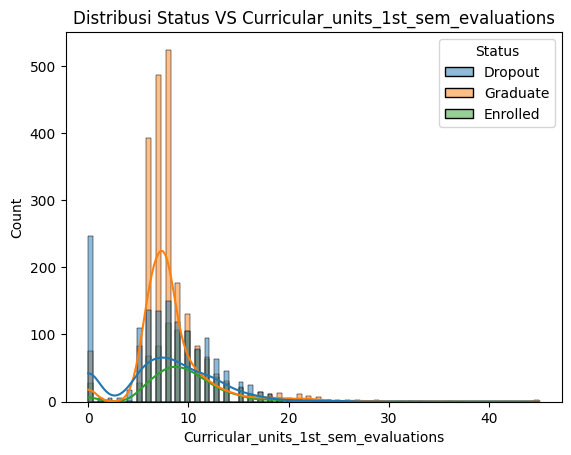

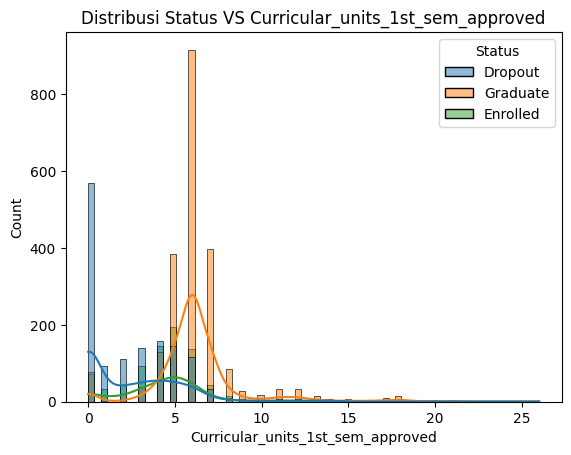

In [18]:
numerical_plot(
    feature=numerical_cols[4:8],
    df=decoded_df,
    feature_target='Status'
)

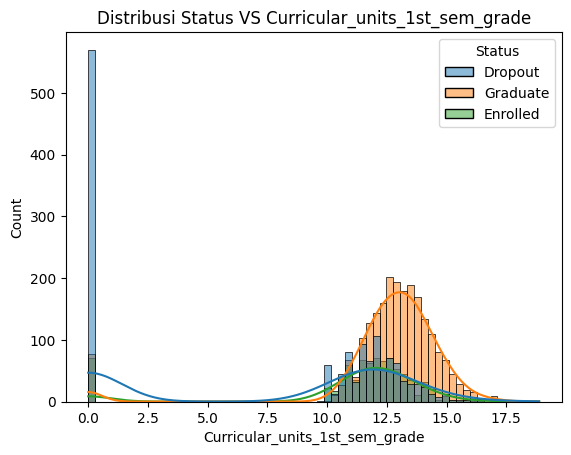

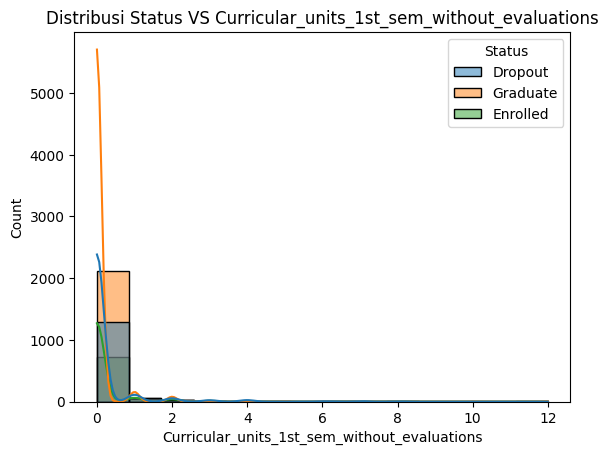

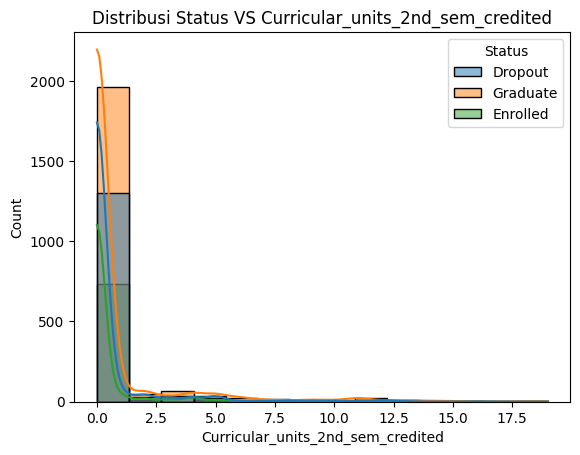

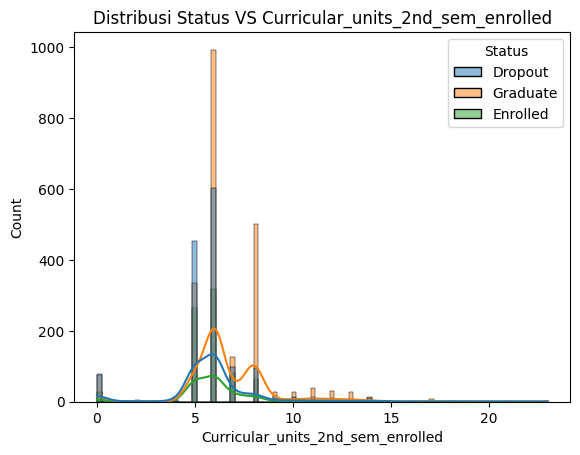

In [19]:
numerical_plot(
    feature=numerical_cols[8:12],
    df=decoded_df,
    feature_target='Status'
)

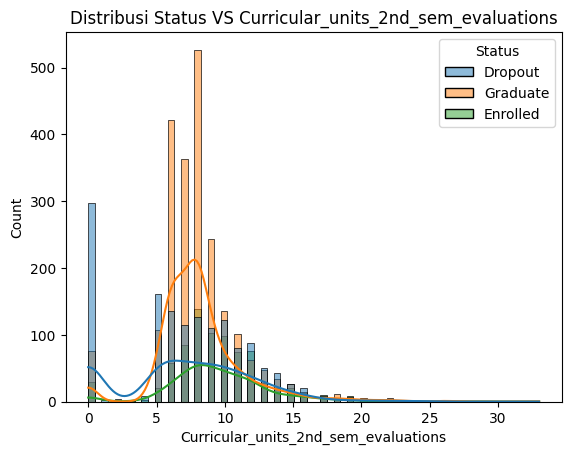

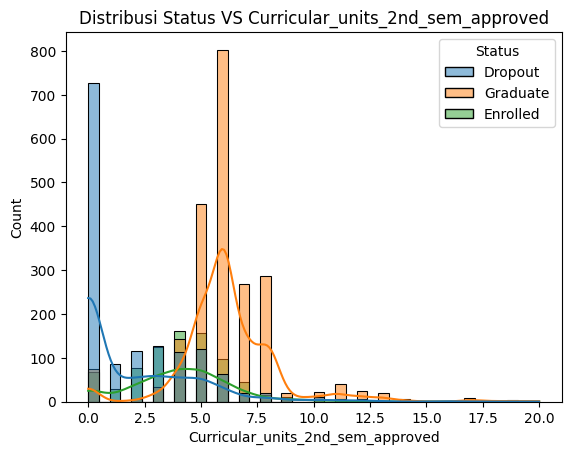

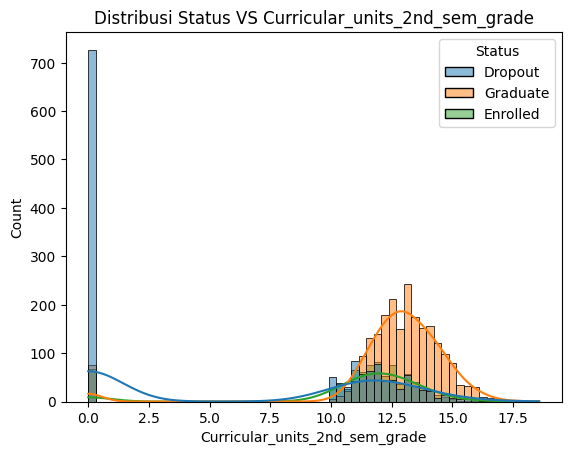

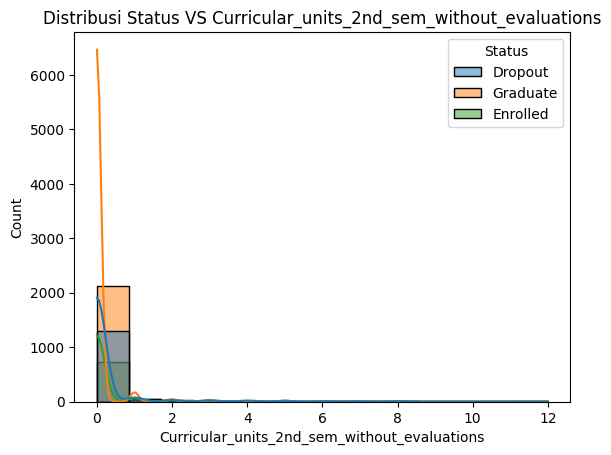

In [20]:
numerical_plot(
    feature=numerical_cols[12:16],
    df=decoded_df,
    feature_target='Status'
)

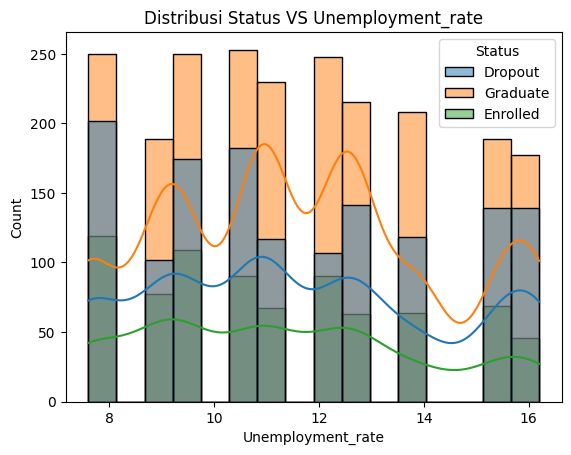

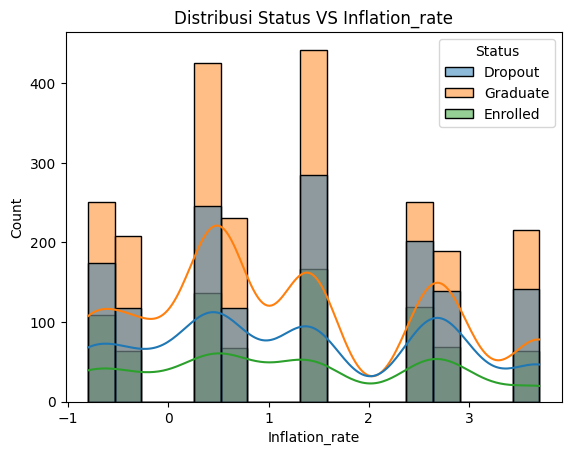

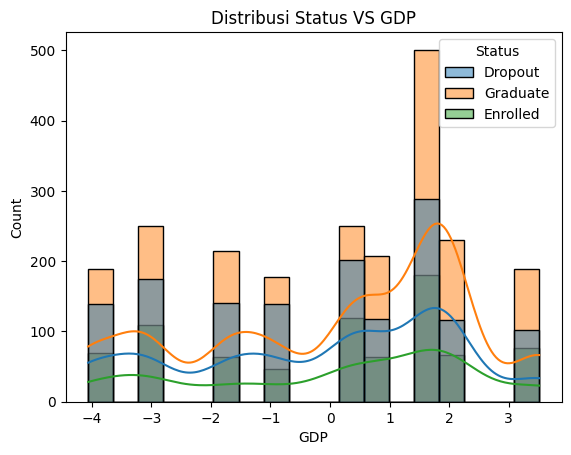

In [21]:
numerical_plot(
    feature=numerical_cols[16:],
    df=decoded_df,
    feature_target='Status'
)

##### Status vs Categorical Features

melakukan drop terhadap fitur target dari variabel **categorical_cols**

In [22]:
# membuat variabel yang menampung kolom bertipe kategori
categorical_cols = ['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International']

Membuat helper function bernama `categorical_plot`, untuk memebantu melakukan plot pada fitur kategorikal.

In [23]:
# fungsi plot fitur kategori
def categorical_plot(feature, df, feature_target):
    for col in feature:
        sns.catplot(x=col, hue=feature_target, kind='count', dodge=False, height=4, aspect=3, data=df)
        plt.title(f'Distribusi Status VS {col}')
        plt.xticks(rotation=90)
        plt.show()

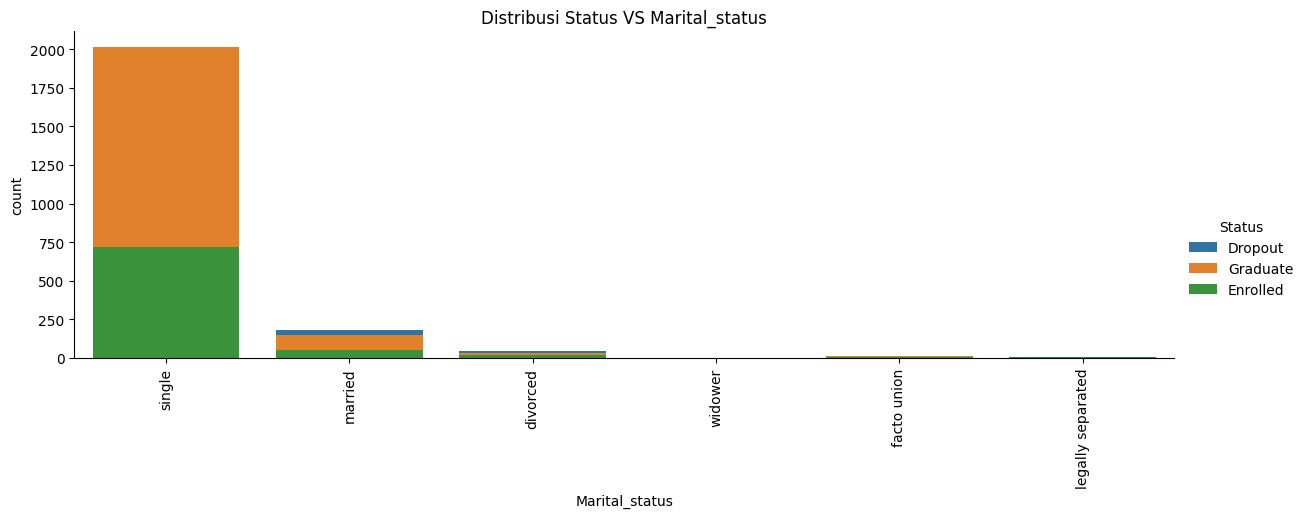

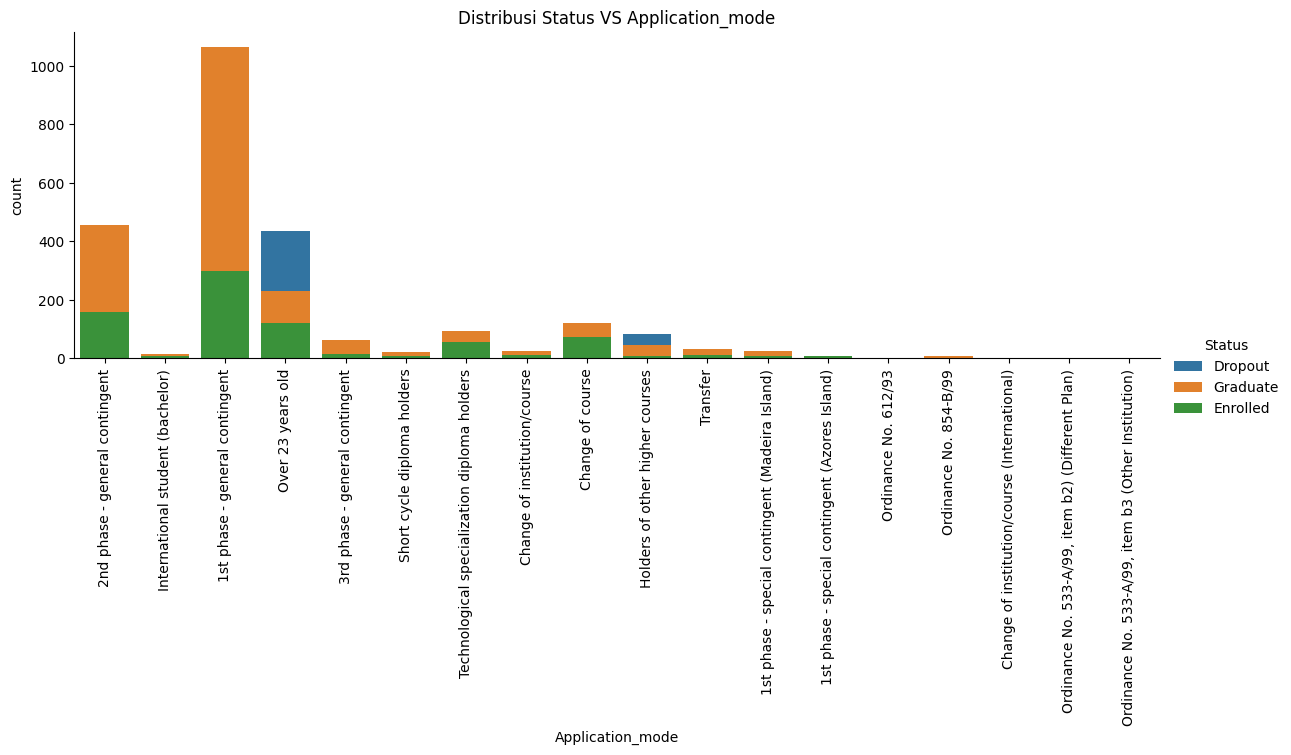

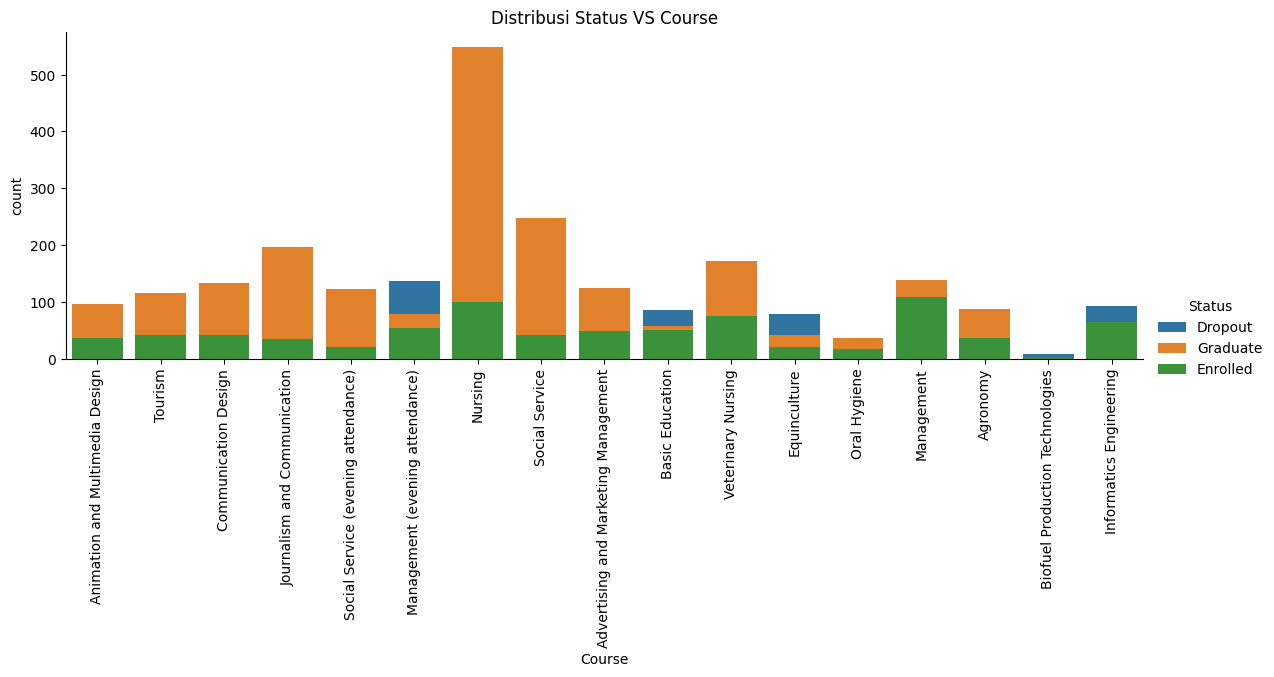

In [24]:


categorical_plot(
    feature=categorical_cols[:3],
    df=decoded_df,
    feature_target='Status'
)

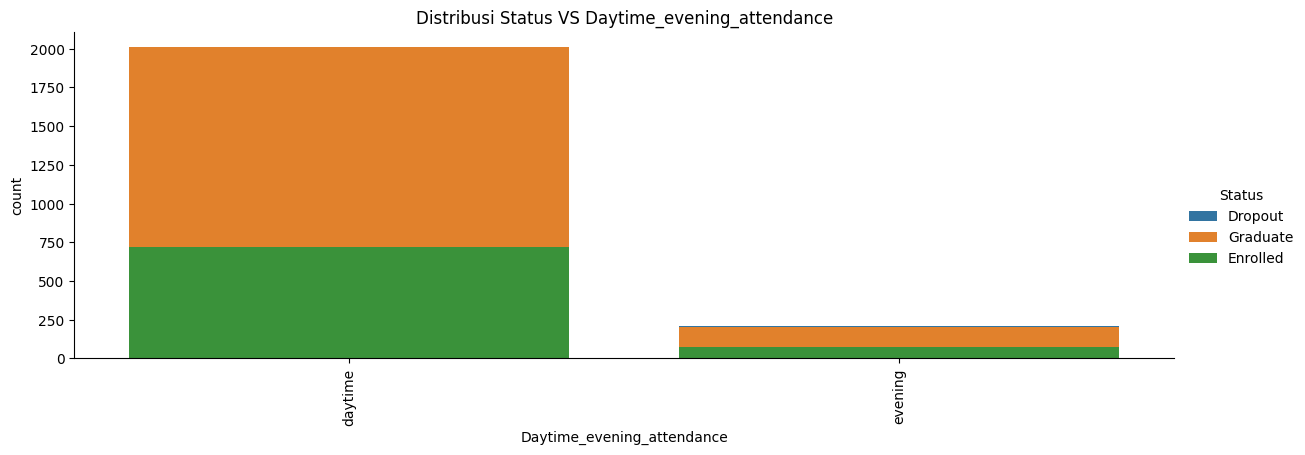

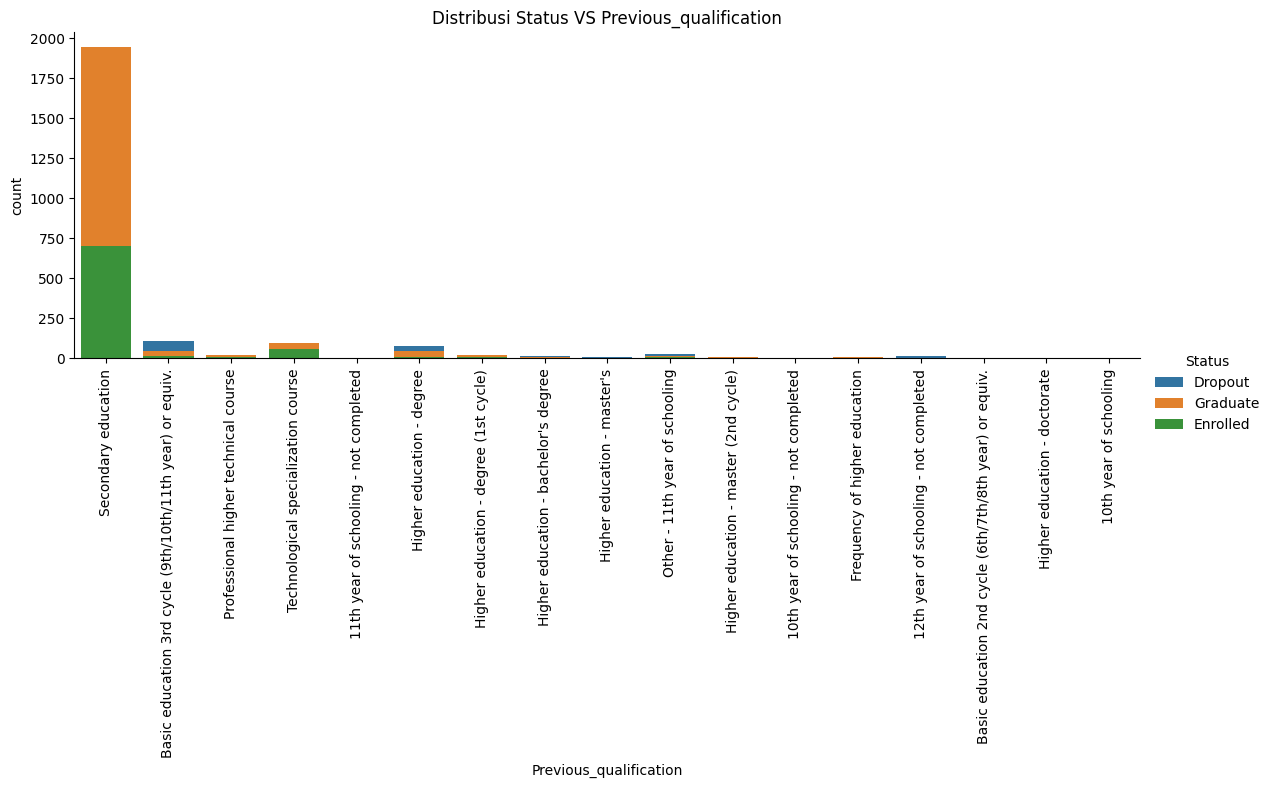

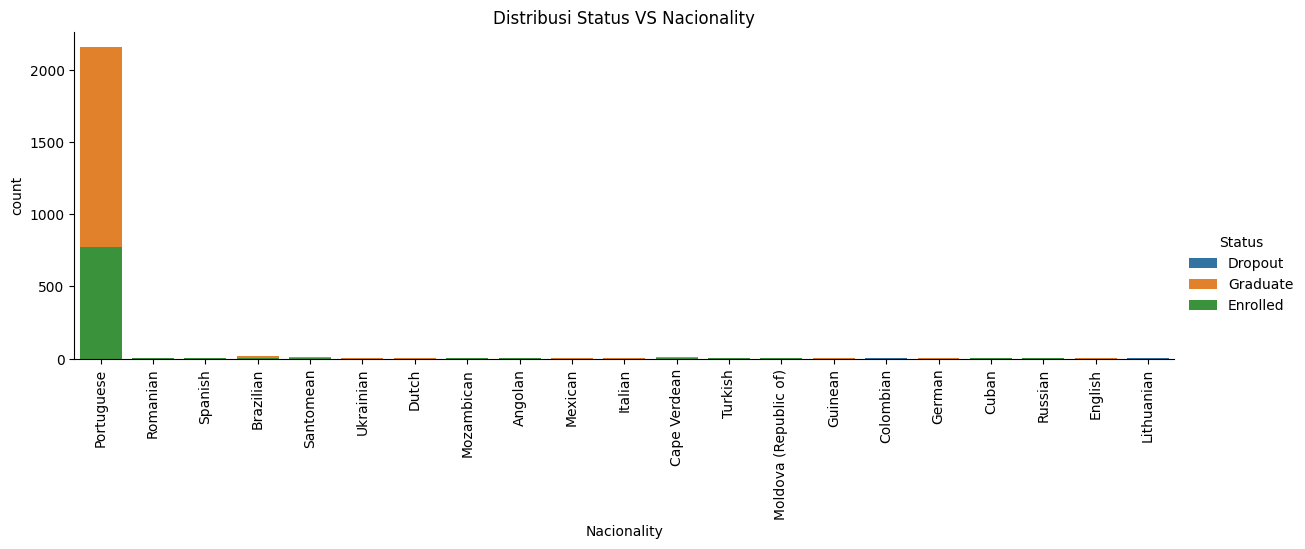

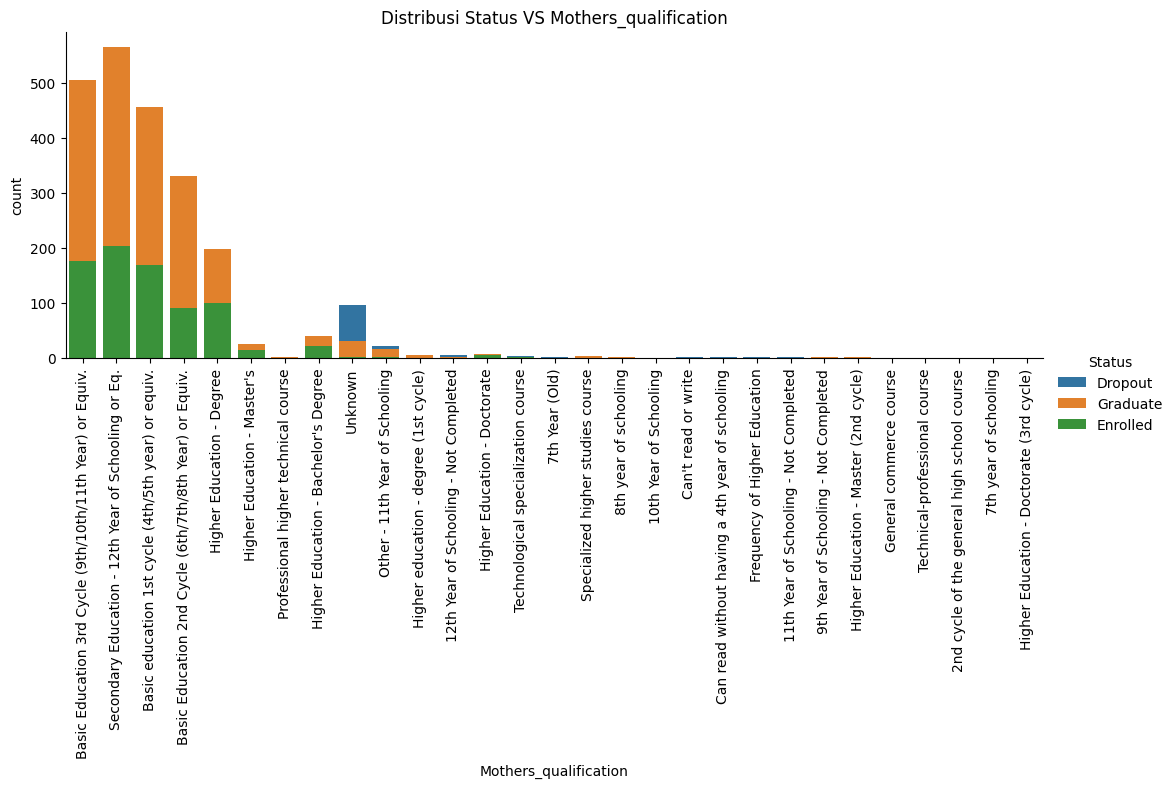

In [25]:
categorical_plot(
    feature=categorical_cols[3:7],
    df=decoded_df,
    feature_target='Status'
)

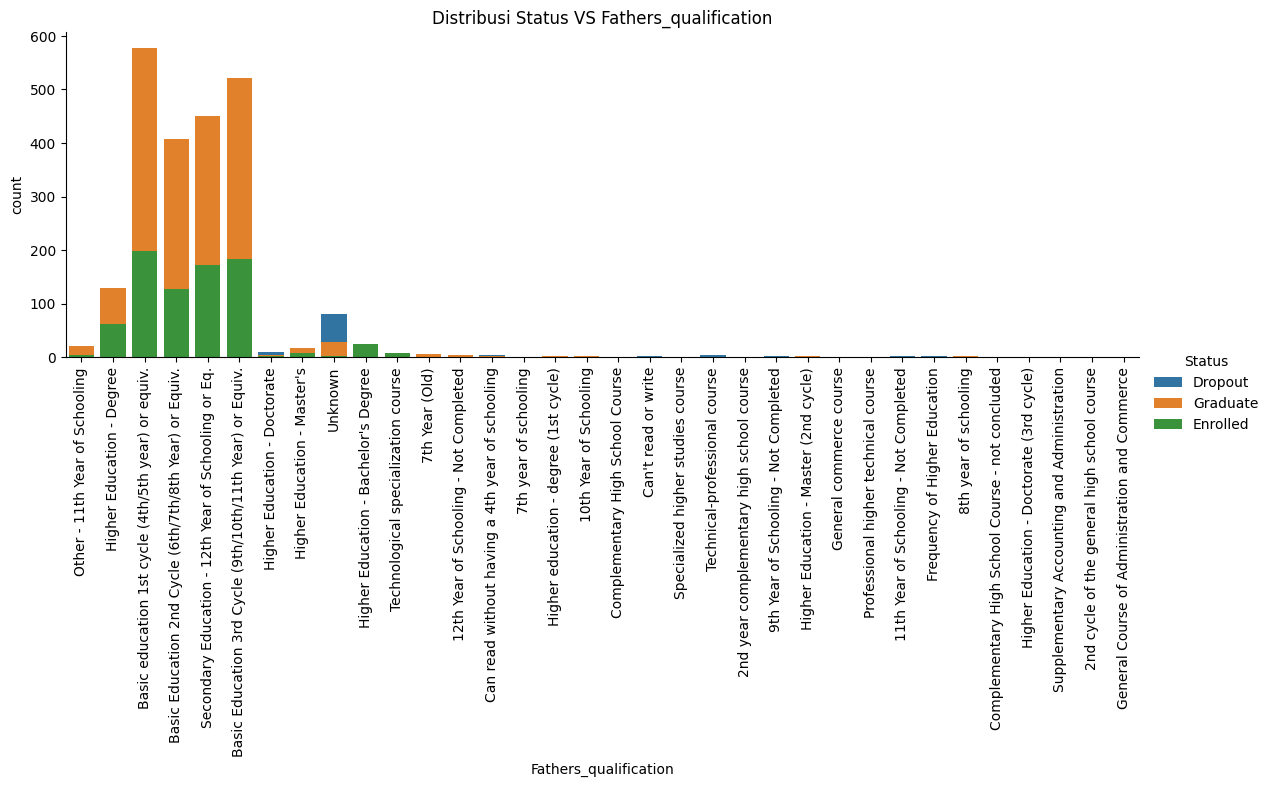

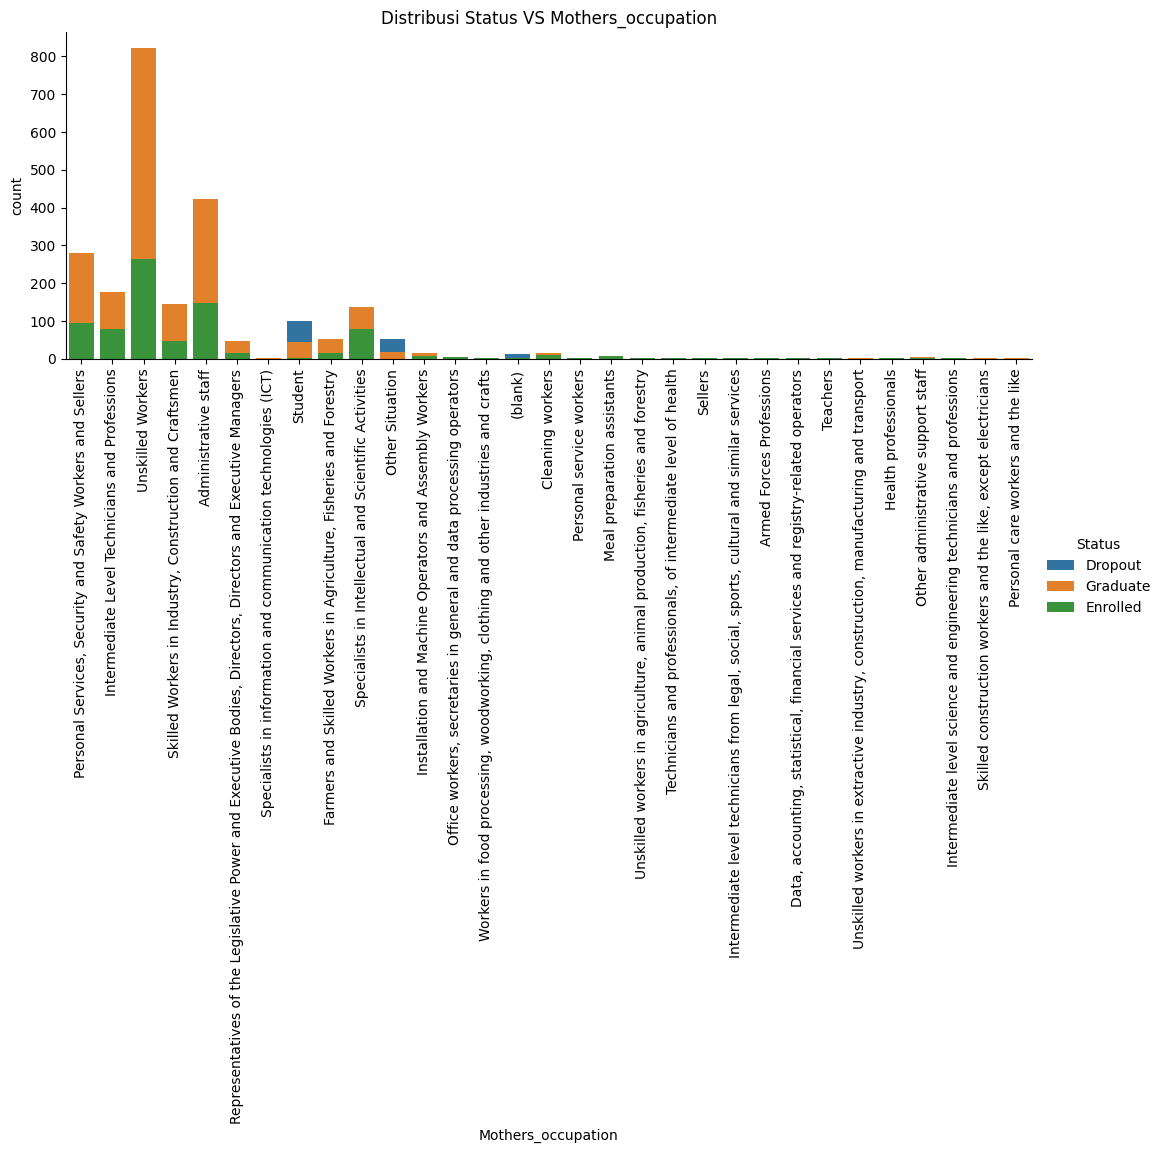

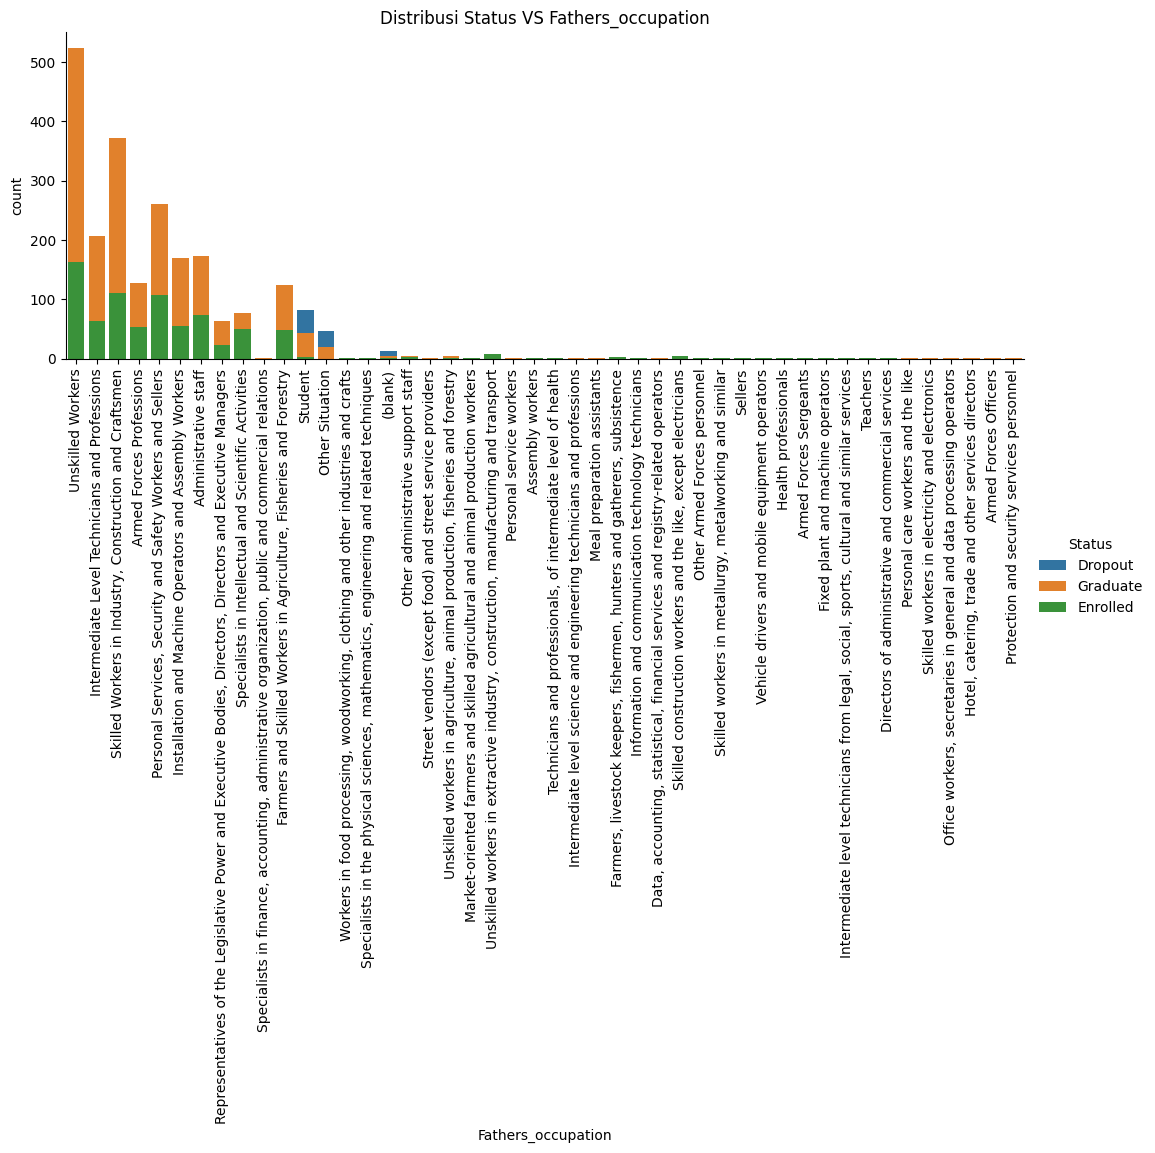

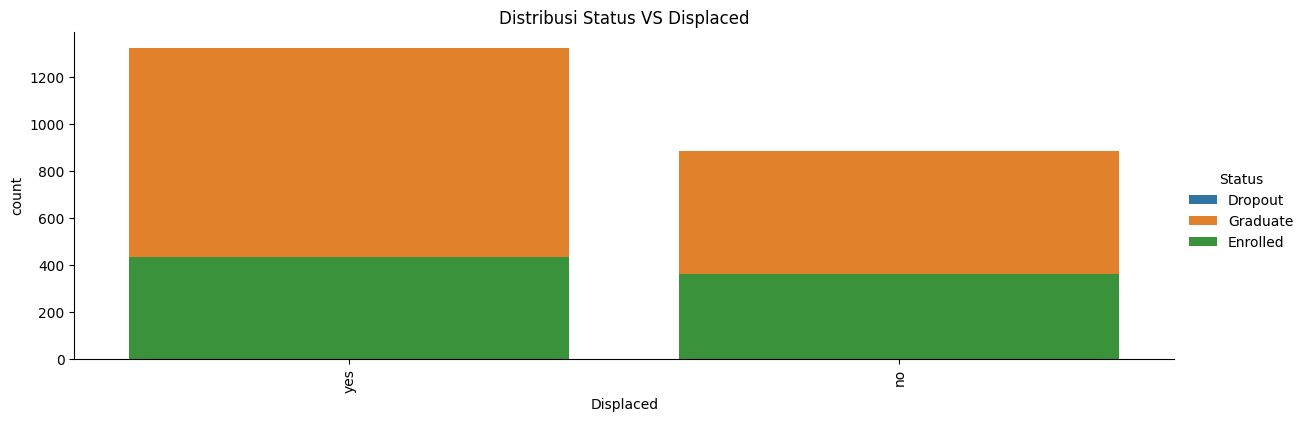

In [26]:
categorical_plot(
    feature=categorical_cols[7:11],
    df=decoded_df,
    feature_target='Status'
)

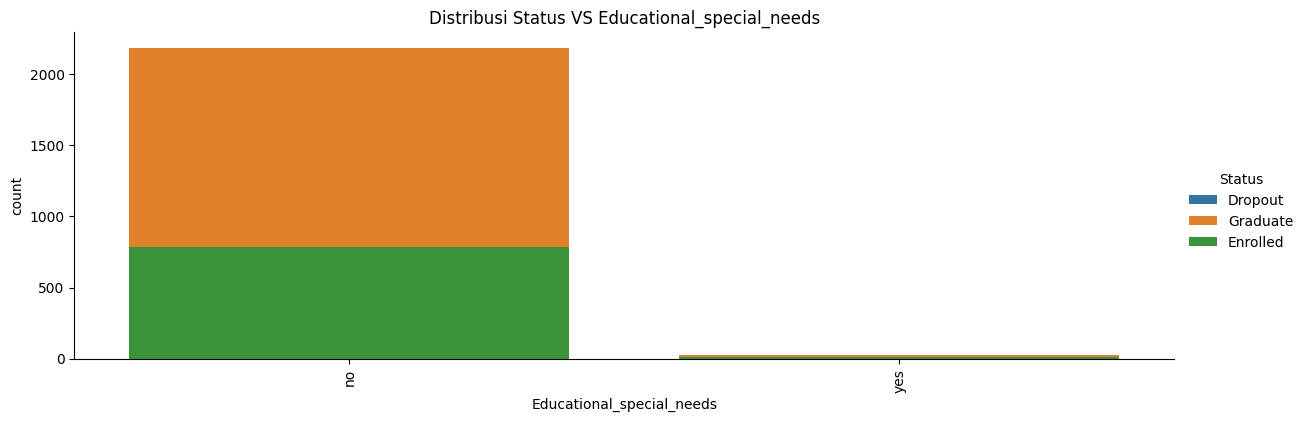

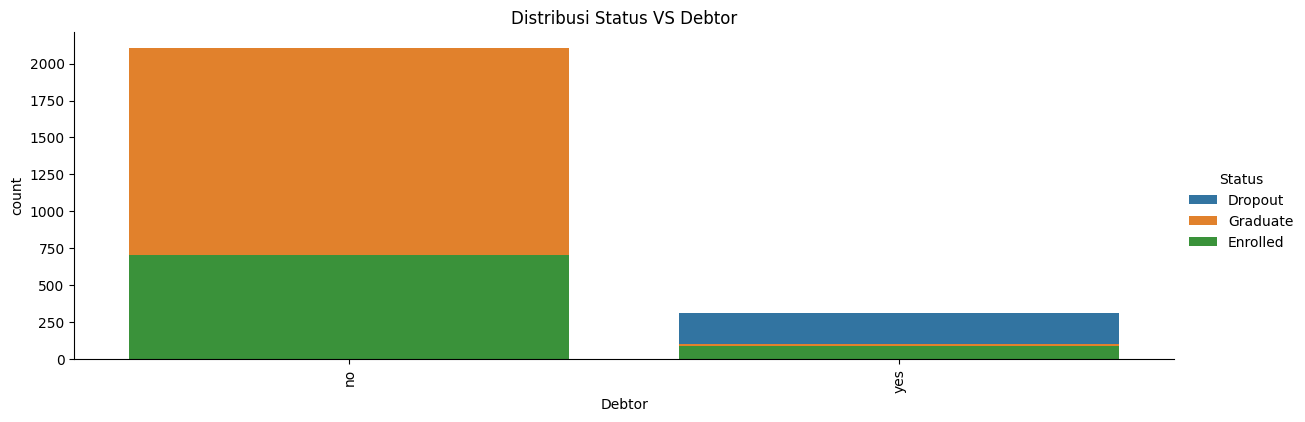

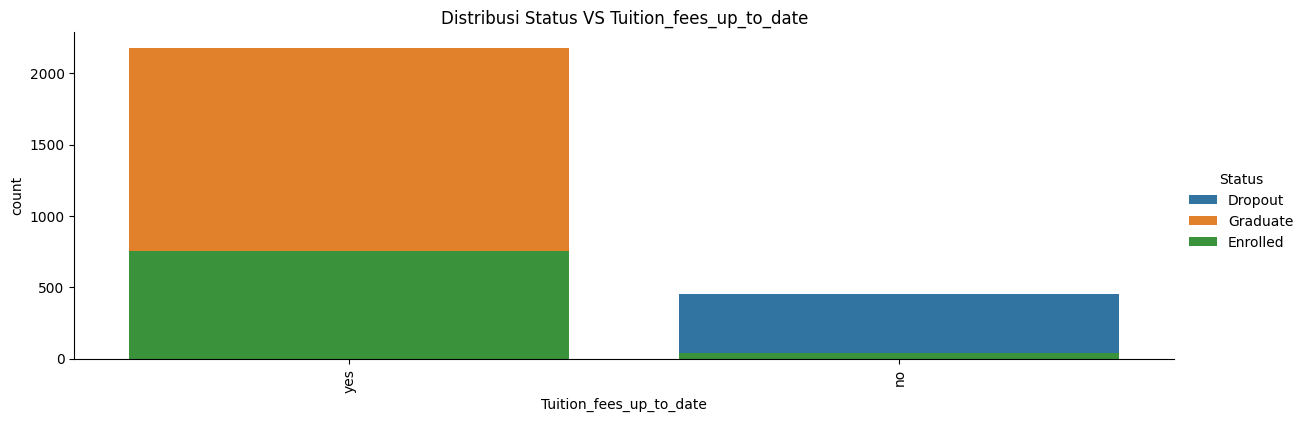

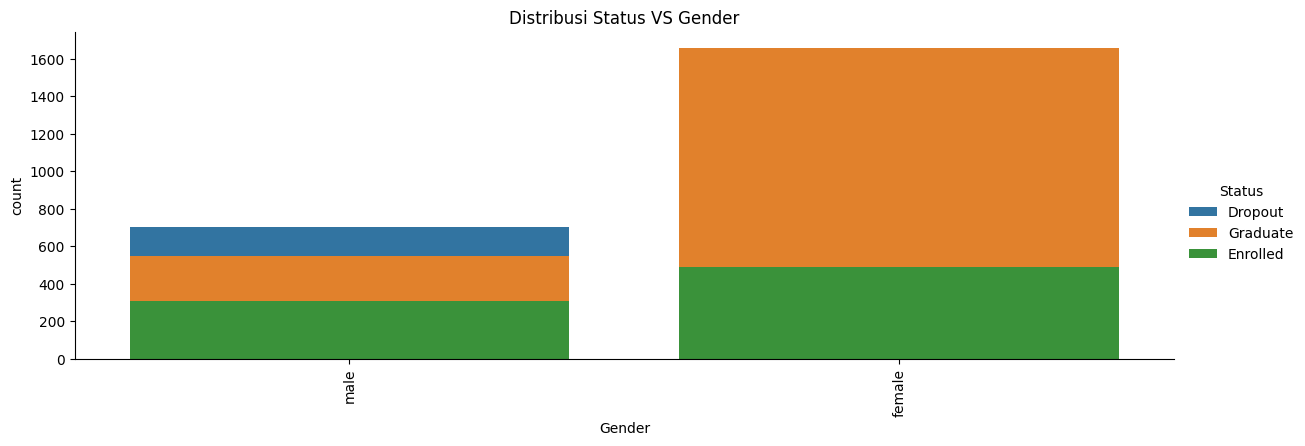

In [27]:
categorical_plot(
    feature=categorical_cols[11:15],
    df=decoded_df,
    feature_target='Status'
)

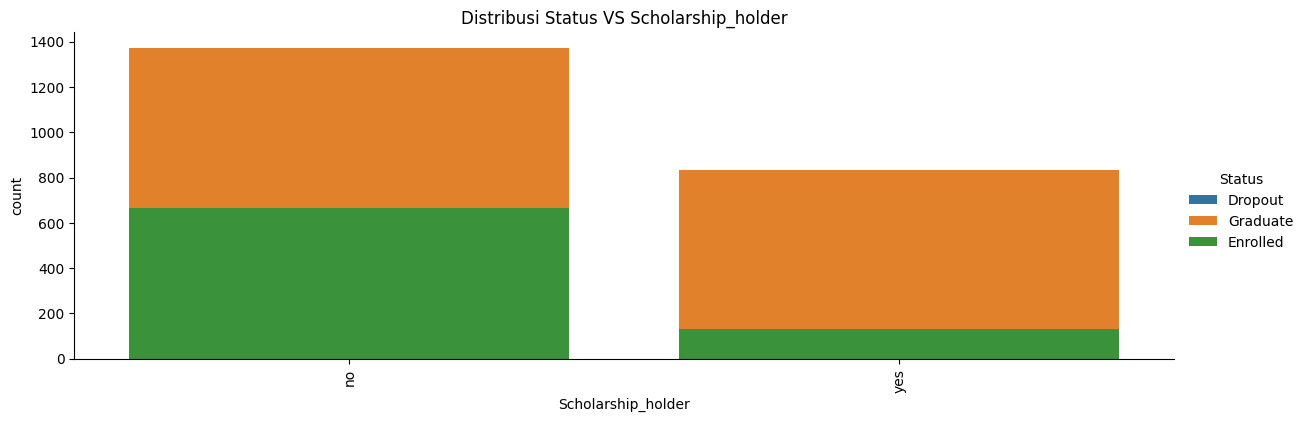

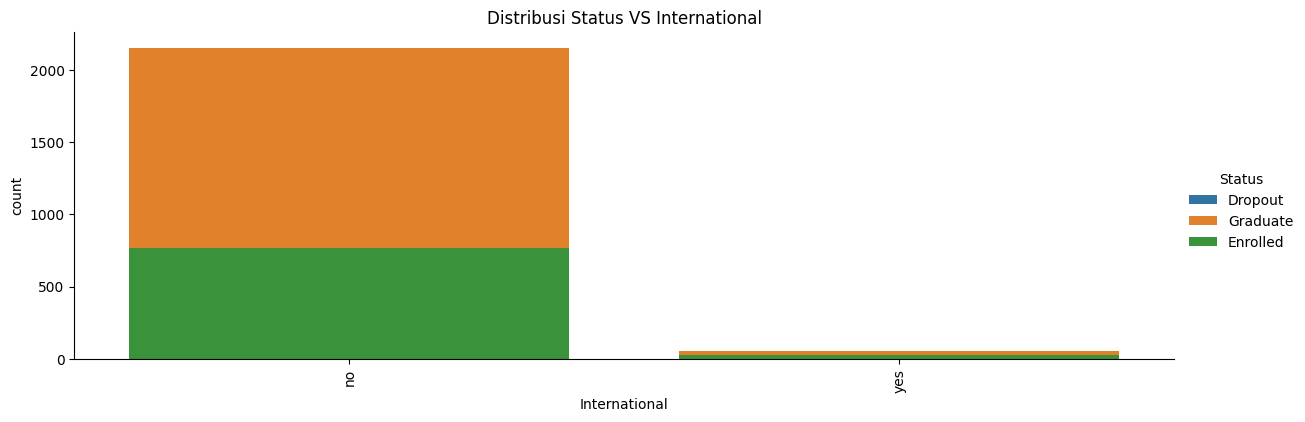

In [28]:
categorical_plot(
    feature=categorical_cols[15:],
    df=decoded_df,
    feature_target='Status'
)

Berdasarkan plot tersebut dapat dilihat bahwasanya pada fitur:  
- **Marital_status**, mayoritas mahasiswa berstatus **single**, dengan mahasiswa Dropout kebanyakan dari status **married** dan **divorced**.
- **Application_mode**, mayoritas mahasiswa mendaftar dengan jalur **1st phase - general contingent**, dengan persentase mahasiswa dropout terbanyak ada pada jalur pendaftaran **Over 23 years old**. 
- **Course**, mayoritas mahasiswa berasal dari jurusan/prodi **Nursing** dan **Social Service**, dengan mahasiswa yang dropout kebanyakan berasal dari jurusan/program studi **Management(evening attandance)**, **Basic Education**, **Equinculture**, **Biofuel Production Technologies**, serta **Informatics Engineering**.
- **Daytime_evening_attendance**, Mayoritas mahasiswa mengambil kelas siang dan kebanyakan mahasiswa yang dropout dari kelas malam.
- **Previous_qualification**, Mayoritas mahasiswa berasal dari pendidikan **Secondary Education** dengan mahasiswa DO paling banyak dari **Basic Education 3rd cycle or equivalent**.
- **Nacionality**, Mayoritas mahasiswa berasal dari **Portuguese**
- **Mothers_qualification** dan **Fathers_qualification**, Mayoritas ayah dan ibu mahasiswa berasal dari latarbelakang pendidikan Basic Education 1st, 2nd, 3rd Cycle or equiv, dan Secondary education.
- **Mothers_occupation** dan **Fathers_occupation**, Mayoritas ayah dan ibu mahasiswa **Unskilled Worker**
- **Deptor**, Mayoritas mahasiswa tidak memiliki tunggakan, dan mahasiswa yang memiliki tunggakan cenderung untuk Dropout.
- **Tuition_fees_up_to_date**, Mayoritas pembayaran uang kuliah mahasiswa lancar, dan mahasiswa yang tidak lancar pembayaran uang kuliah memiliki kecenderungan untuk dropout.
- **Gender**, Mayoritas mahasiswa berjenis kelamin Perempuan, dan mahasiswa dengan jenis kelamin laki-laki lebih banyak DO dibandingkan dengan perempuan.

#### Korelasi Fitur terhadap Fitur Target

membuat plot korelasi antar fitur terhadap fitur target mengunakan heatmap.

Hal ini dilakukan untuk melihat fitur-fitur apa saja yang memiliki korelasi yang tinggi terhadap fitur target.

In [29]:
# Membuat dataframe baru
new_df = df.copy()

In [30]:
# Melakukan Encoding pada fitur target
new_df['Status'] = new_df['Status'].map({'Dropout':0, 'Enrolled':1, 'Graduate':2})

In [31]:
# membuat korelasi antar fitur
cm = new_df.corr()

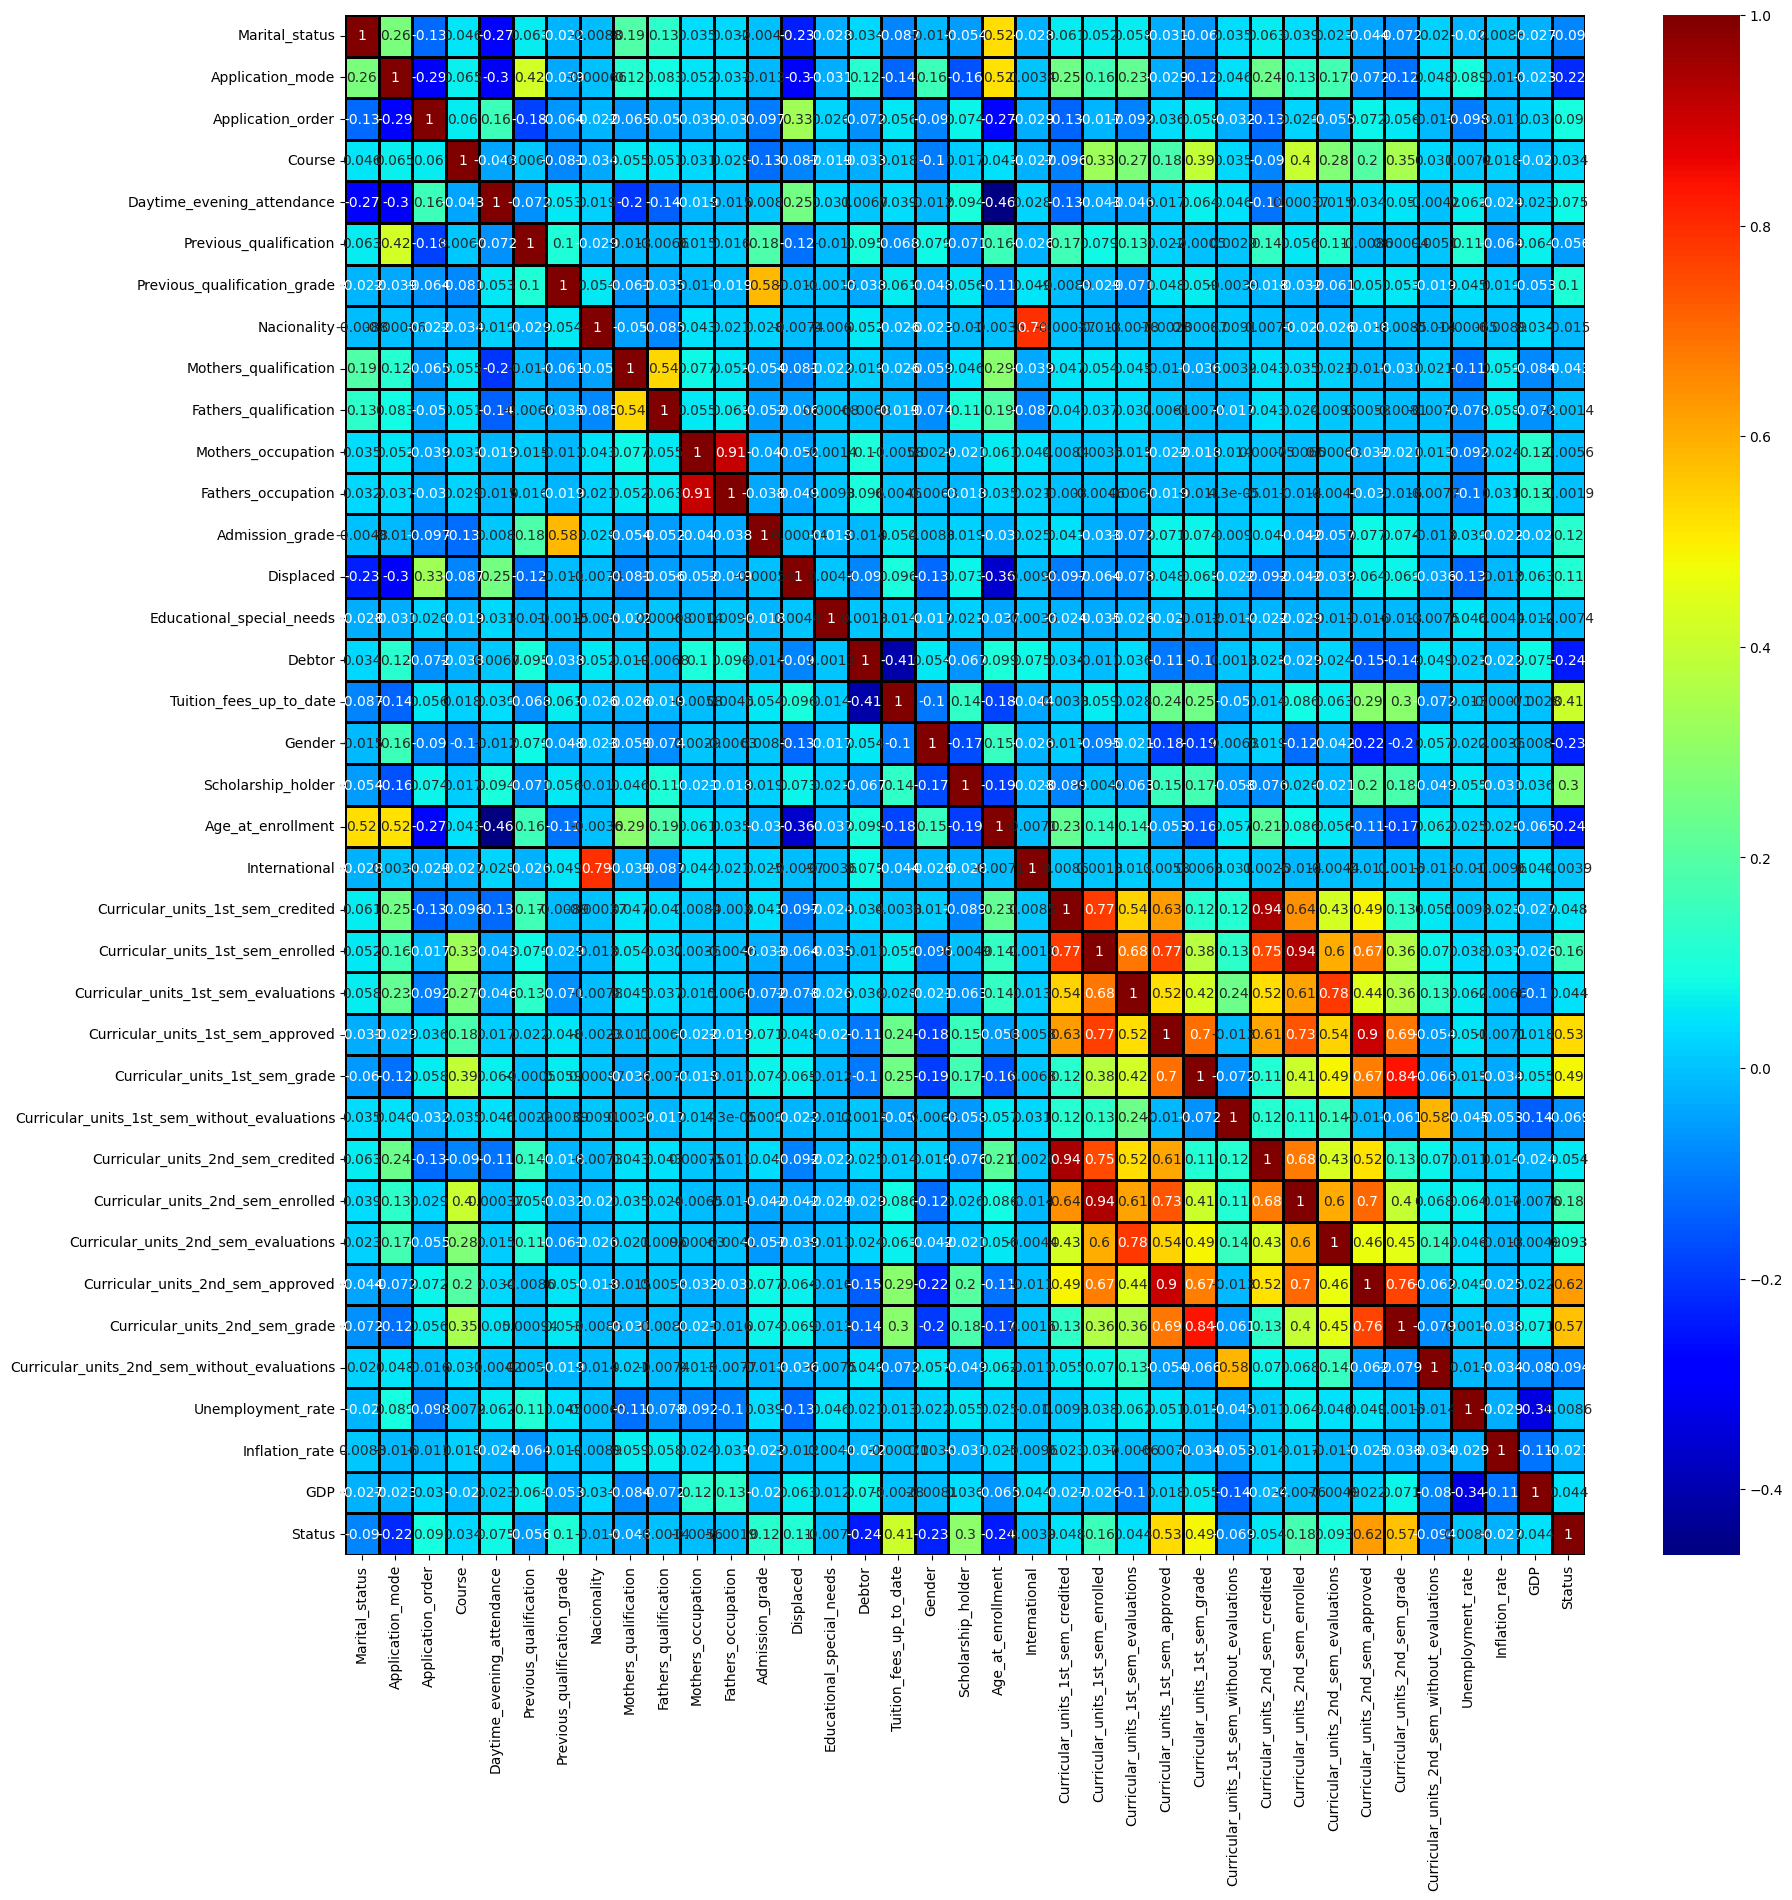

In [32]:
# melakukan plot korelasi
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

In [33]:
# Mengurutkan secara descending fitur-fitur yang memiliki korelasi tertinggi terhadap fitur target
status_cm = cm['Status'].sort_values(ascending=False)

In [34]:
status_cm

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evalua

melakukan plot 15 fitur yang memiliki nilai korelasi tertinggi terhadap fitur target. 

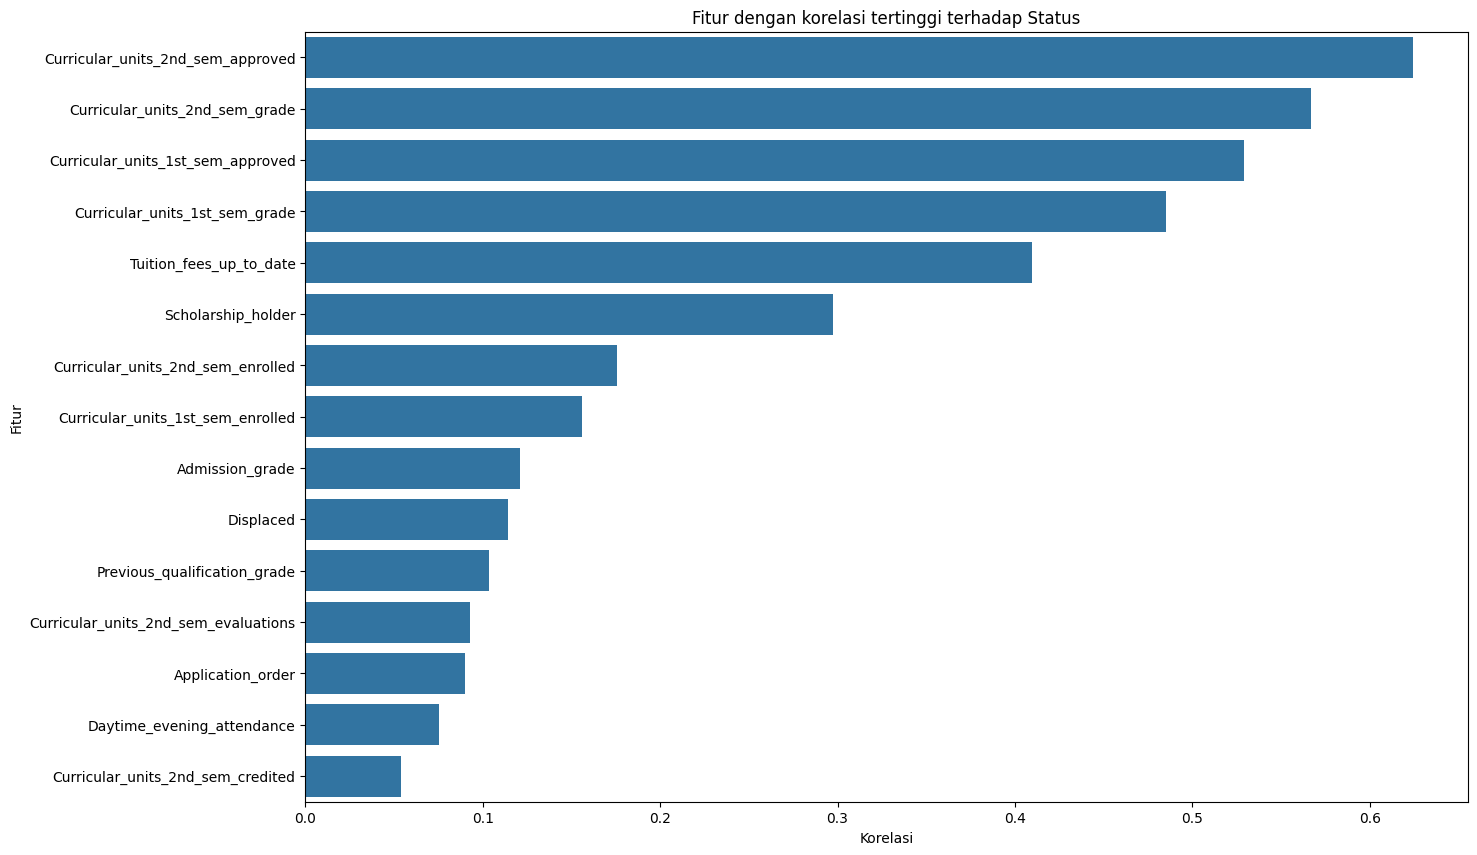

In [35]:
# menampilkan plot 15 korelasi tertinggi
plt.figure(figsize=(15, 10))
sns.barplot(x=status_cm.values[1:16], y=status_cm.index[1:16])
plt.title('Fitur dengan korelasi tertinggi terhadap Status')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.show()

Berdasarkan plot korelasi keseluruhan fitur terhadap fitur target, dapat dilihat bahwa fitur **Curricular_units_2nd_sem_approved** memiliki korelasi tertinggi, dan fitur **Age_at_enrollment** memiliki korelasi terendah.

Menyimpan dataset yang telah di lakukan label decoding untuk selanjutnya digunakan dalam pembuatan dashboard.

In [36]:
decoded_df.to_csv('dataset/decoded_data.csv',sep=';', index=False)

## Data Preparation / Preprocessing

berdasarkan heatmap plot korelasi fitur target sebelumnya, untuk membuat model akan menggunakan 15 fitur dengan korelasi tertinggi terhadap fitur target. hal ini guna untuk mempercepat proses training dan meringankan komputasi.

membuat data frame baru dengan menyalin 15 fitur korelasi tertinggi dari `decoded_df`.

In [42]:
model_df = decoded_df[[
    'Status', 
    'Curricular_units_2nd_sem_approved', 
    'Curricular_units_2nd_sem_grade', 
    'Curricular_units_1st_sem_approved', 
    'Curricular_units_1st_sem_grade', 
    'Tuition_fees_up_to_date', 
    'Scholarship_holder', 
    'Curricular_units_2nd_sem_enrolled', 
    'Curricular_units_1st_sem_enrolled', 
    'Admission_grade', 
    'Displaced', 
    'Previous_qualification_grade', 
    'Curricular_units_2nd_sem_evaluations', 
    'Application_order', 
    'Daytime_evening_attendance', 
    'Curricular_units_2nd_sem_credited'
    ]].copy()



In [ ]:
# Menampilkan 5 data teratas
model_df.head()

Status  Curricular_units_2nd_sem_approved  \
0   Dropout                                  0   
1  Graduate                                  6   
2   Dropout                                  0   
3  Graduate                                  5   
4  Graduate                                  6   

   Curricular_units_2nd_sem_grade  Curricular_units_1st_sem_approved  \
0                        0.000000                                  0   
1                       13.666667                                  6   
2                        0.000000                                  0   
3                       12.400000                                  6   
4                       13.000000                                  5   

   Curricular_units_1st_sem_grade Tuition_fees_up_to_date Scholarship_holder  \
0                        0.000000                     yes                 no   
1                       14.000000                      no                 no   
2                        0.000000                      no                 no   
3                       13.428571                     yes                 no   
4                       12.333333                     yes                 no   

   Curricular_units_2nd_sem_enrolled  Curricular_units_1st_sem_enrolled  \
0                                  0                                  0   
1                                  6                                  6   
2                                  6                                  6   
3                                  6                                  6   
4                                  6                                  6   

   Admission_grade Displaced  Previous_qualification_grade  \
0            127.3       yes                         122.0   
1            142.5       yes                         160.0   
2            124.8       yes                         122.0   
3            119.6       yes                         122.0   
4            141.5        no                         100.0   

   Curricular_units_2nd_sem_evaluations  Application_order  \
0                                     0                  5   
1                                     6                  1   
2                                     0                  5   
3                                    10                  2   
4                                     6                  1   

  Daytime_evening_attendance  Curricular_units_2nd_sem_credited  
0                    daytime                                  0  
1                    daytime                                  0  
2                    daytime                                  0  
3                    daytime                                  0  
4                    evening                                  0

In [ ]:
# variabel menampung fitur kategori
cat_cols = [
    'Status', 
    'Tuition_fees_up_to_date', 
    'Scholarship_holder',
    'Displaced',
    'Daytime_evening_attendance',
]

# variabel menampung fitur numerik
num_cols = [
    'Curricular_units_2nd_sem_approved', 
    'Curricular_units_2nd_sem_grade', 
    'Curricular_units_1st_sem_approved', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 
    'Curricular_units_1st_sem_enrolled', 
    'Admission_grade',
    'Previous_qualification_grade', 
    'Curricular_units_2nd_sem_evaluations', 
    'Application_order',
    'Curricular_units_2nd_sem_credited'
]

### Label Encoding dan Scaling

In [ ]:
# Membuat helper function untuk melakukan scaling menggunakan MinMaxScaler terhadap fitur numerik
def scaling(features, df):
    for feature in features:
        scaler = MinMaxScaler()
        scaled_feature = scaler.fit_transform(df[[feature]])
        scaled_feature = scaled_feature.reshape(-1, 1)
        df[feature] = scaled_feature
        # menyimpan scaler fitur
        joblib.dump(scaler, 'model/scaler_{}.joblib'.format(feature))
    return df

# Membuat helper function untuk melakukan scaling menggunakan LabelEncoder terhadap fitur kategori
def encoding(features, df):
    for feature in features:
        encoder = LabelEncoder()
        encoded_feature = encoder.fit_transform(df[feature])
        df[feature] = encoded_feature
        # menyimpan encoder fitur
        joblib.dump(encoder, 'model/encoder_{}.joblib'.format(feature))
    return df

In [ ]:
# melakukan scaling dan encoding
df_model = scaling(num_cols, model_df)
df_model = encoding(cat_cols, model_df)

In [ ]:
# menampilkan data setelah scaling dan encoding
df_model.head()

Status  Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0       0                               0.00                        0.000000   
1       2                               0.30                        0.735897   
2       0                               0.00                        0.000000   
3       2                               0.25                        0.667692   
4       2                               0.30                        0.700000   

   Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                           0.000000                        0.000000   
1                           0.230769                        0.741722   
2                           0.000000                        0.000000   
3                           0.230769                        0.711447   
4                           0.192308                        0.653422   

   Tuition_fees_up_to_date  Scholarship_holder  \
0                        1                   0   
1                        0                   0   
2                        0                   0   
3                        1                   0   
4                        1                   0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_1st_sem_enrolled  \
0                            0.00000                           0.000000   
1                            0.26087                           0.230769   
2                            0.26087                           0.230769   
3                            0.26087                           0.230769   
4                            0.26087                           0.230769   

   Admission_grade  Displaced  Previous_qualification_grade  \
0         0.340000          1                      0.284211   
1         0.500000          1                      0.684211   
2         0.313684          1                      0.284211   
3         0.258947          1                      0.284211   
4         0.489474          0                      0.052632   

   Curricular_units_2nd_sem_evaluations  Application_order  \
0                              0.000000           0.555556   
1                              0.181818           0.111111   
2                              0.000000           0.555556   
3                              0.303030           0.222222   
4                              0.181818           0.111111   

   Daytime_evening_attendance  Curricular_units_2nd_sem_credited  
0                           0                                0.0  
1                           0                                0.0  
2                           0                                0.0  
3                           0                                0.0  
4                           1                                0.0

### Split dataset

Split dataset pada proyek ini menggunakan proporsi 80% untuk training dan 20% untuk testing.

In [50]:
X = df_model.drop(['Status'], axis=1)
y = df_model['Status']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [52]:
print(X_train.shape)
print(y_train.shape)

(3539, 15)
(3539,)


## Modeling

Model yang digunakan adalah `RandomForestClassifier()` dan menerapkan GridSearch untuk mencari parameter terbaik untuk model tersebut.

In [ ]:
model = RandomForestClassifier()

# membuat parameter gridsearch
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

print('Grid Search dimulai...')
grid_search.fit(X_train, y_train)
print('\n Grid Search Selesai...')
best_parameter = grid_search.best_params_
print(f'Parameter Terbaik: {best_parameter}')


Grid Search dimulai...

 Grid Search Selesai...
Parameter Terbaik: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


Melakukan pelatihan model RDF dengan menggunakan parameter terbaik yang telah didapat sebelumnya.

In [56]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)

rdf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, n_jobs=-1,
                       random_state=123)

In [57]:
# Menyimpan Model rdf
joblib.dump(rdf_model, 'model/rdf_model.joblib')

['model/rdf_model.joblib']

## Evaluation

In [ ]:
# melakukan testing model
y_pred = rdf_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.7502824858757062


In [ ]:
# membuat classification report
print('Classification Report: ', classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.83      0.73      0.78       316
           1       0.48      0.27      0.35       151
           2       0.75      0.94      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885



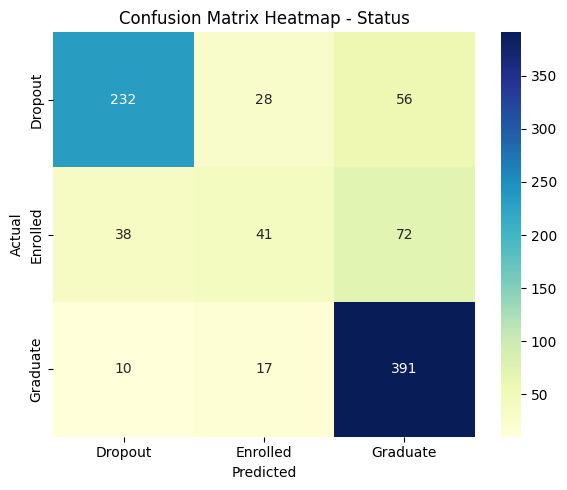

In [ ]:
# melakukan plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Dropout', 'Enrolled', 'Graduate']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Status')
plt.tight_layout()
plt.show()

Model memiliki akurasi yang baik, yaitu mencapai 75.02%.

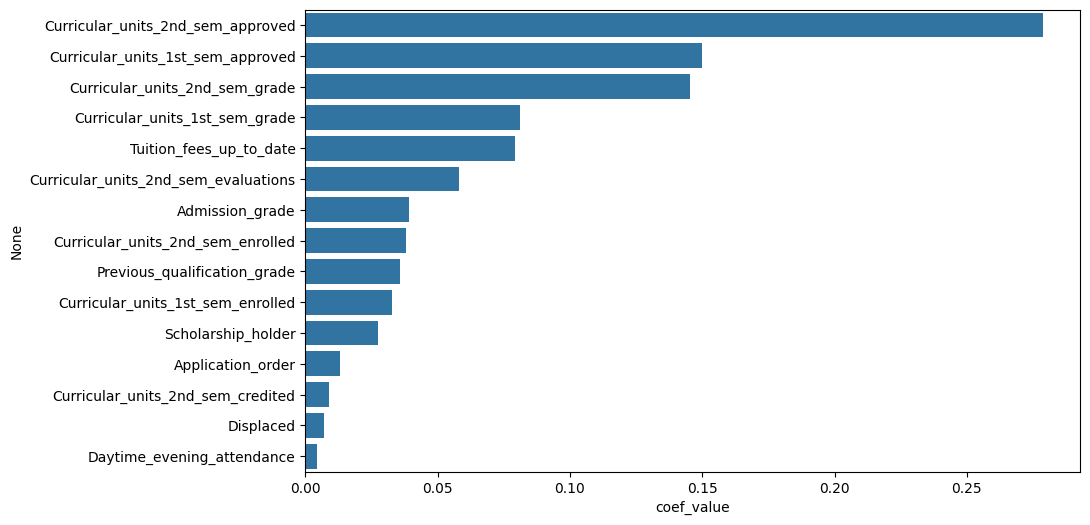

coef_value
Curricular_units_2nd_sem_approved       0.278969
Curricular_units_1st_sem_approved       0.150034
Curricular_units_2nd_sem_grade          0.145448
Curricular_units_1st_sem_grade          0.081284
Tuition_fees_up_to_date                 0.079196
Curricular_units_2nd_sem_evaluations    0.057996
Admission_grade                         0.039062
Curricular_units_2nd_sem_enrolled       0.038079
Previous_qualification_grade            0.035810
Curricular_units_1st_sem_enrolled       0.032857
Scholarship_holder                      0.027476
Application_order                       0.013215
Curricular_units_2nd_sem_credited       0.008962
Displaced                               0.007076
Daytime_evening_attendance              0.004536

In [62]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(rdf_model.feature_importances_, X.columns)